## Data Acquisition and Combination

In [204]:
import pandas as pd

combined_df = pd.DataFrame()

csv_files = ['amsterdam_weekdays.csv',
         'athens_weekdays.csv',
         'barcelona_weekdays.csv',
         'berlin_weekdays.csv',
         'budapest_weekdays.csv',
         'lisbon_weekdays.csv',
         'london_weekdays.csv',
         'paris_weekdays.csv',
         'rome_weekdays.csv',
         'vienna_weekdays.csv'
        ]

combined_df = []
directory = 'air_bnb_data/'

for file_name in csv_files:
    city_name = file_name.split('_')[0]
    df = pd.read_csv(f"{directory}{file_name}")
    df.insert(0, 'city', city_name)
    combined_df.append(df)
    
combined_df = pd.concat(combined_df, ignore_index=True)

## Data Exploration and Preprocessing

In [205]:
print(combined_df.shape)

(25500, 21)


In [206]:
print(combined_df.columns)

Index(['city', 'Unnamed: 0', 'realSum', 'room_type', 'room_shared',
       'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')


In [207]:
combined_df.drop(columns=['Unnamed: 0'], inplace=True)

In [208]:
city_count = combined_df['city'].value_counts()
print(city_count)

city
london       4614
rome         4492
paris        3130
lisbon       2857
athens       2653
budapest     2074
vienna       1738
barcelona    1555
berlin       1284
amsterdam    1103
Name: count, dtype: int64


In [209]:
combined_df.head()

,city,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,amsterdam,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,amsterdam,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,amsterdam,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,amsterdam,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,amsterdam,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [210]:
combined_df.tail()

,city,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
25495,vienna,219.012224,Entire home/apt,False,False,4.0,False,0,0,8.0,80.0,0,0.298179,0.257904,851.189543,60.958556,593.167136,14.180090,16.37766,48.20875
25496,vienna,191.197438,Entire home/apt,False,False,4.0,False,0,1,10.0,100.0,2,1.052982,0.332054,195.654600,14.011946,305.781569,7.309930,16.37892,48.19973
25497,vienna,251.501765,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810224,0.100844,204.967222,14.678876,342.177253,8.179995,16.38070,48.20296
25498,vienna,637.636444,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994039,0.202537,169.074867,12.108419,282.299117,6.748565,16.38568,48.20460
25499,vienna,133.230489,Private room,False,True,4.0,True,1,0,10.0,93.0,1,1.263948,0.480922,150.449976,10.774584,225.245048,5.384646,16.39066,48.20811


In [211]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        25500 non-null  object 
 1   realSum                     25500 non-null  float64
 2   room_type                   25500 non-null  object 
 3   room_shared                 25500 non-null  bool   
 4   room_private                25500 non-null  bool   
 5   person_capacity             25500 non-null  float64
 6   host_is_superhost           25500 non-null  bool   
 7   multi                       25500 non-null  int64  
 8   biz                         25500 non-null  int64  
 9   cleanliness_rating          25500 non-null  float64
 10  guest_satisfaction_overall  25500 non-null  float64
 11  bedrooms                    25500 non-null  int64  
 12  dist                        25500 non-null  float64
 13  metro_dist                  255

In [212]:
combined_df.isna().sum()

city                          0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [213]:
combined_df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,275.681904,3.175529,0.293529,0.358745,9.389176,92.586549,1.165725,3.160597,0.680994,293.734519,13.265403,625.004708,23.499036,7.594875,45.568793
std,354.279644,1.308675,0.455388,0.479642,0.954920,8.964563,0.634562,2.385645,0.849603,223.797459,9.699020,500.614980,17.745870,9.827575,5.252706
min,37.129295,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015059,0.003944,15.532918,0.926301,21.455803,0.667010,-9.226340,37.953000
25%,145.168856,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.433281,0.250707,135.310097,6.305256,246.196343,9.829716,-0.065040,41.393000
50%,207.148849,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.591957,0.415916,234.030980,11.330320,519.418450,17.726663,4.892140,47.502130
75%,311.390202,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,4.226353,0.742088,386.369921,17.231257,832.396771,33.411143,16.308532,51.465620
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,22.617451,13.314108,4512.595170,100.000000,5584.771840,100.000000,23.786020,52.641410


## Data Cleaning

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

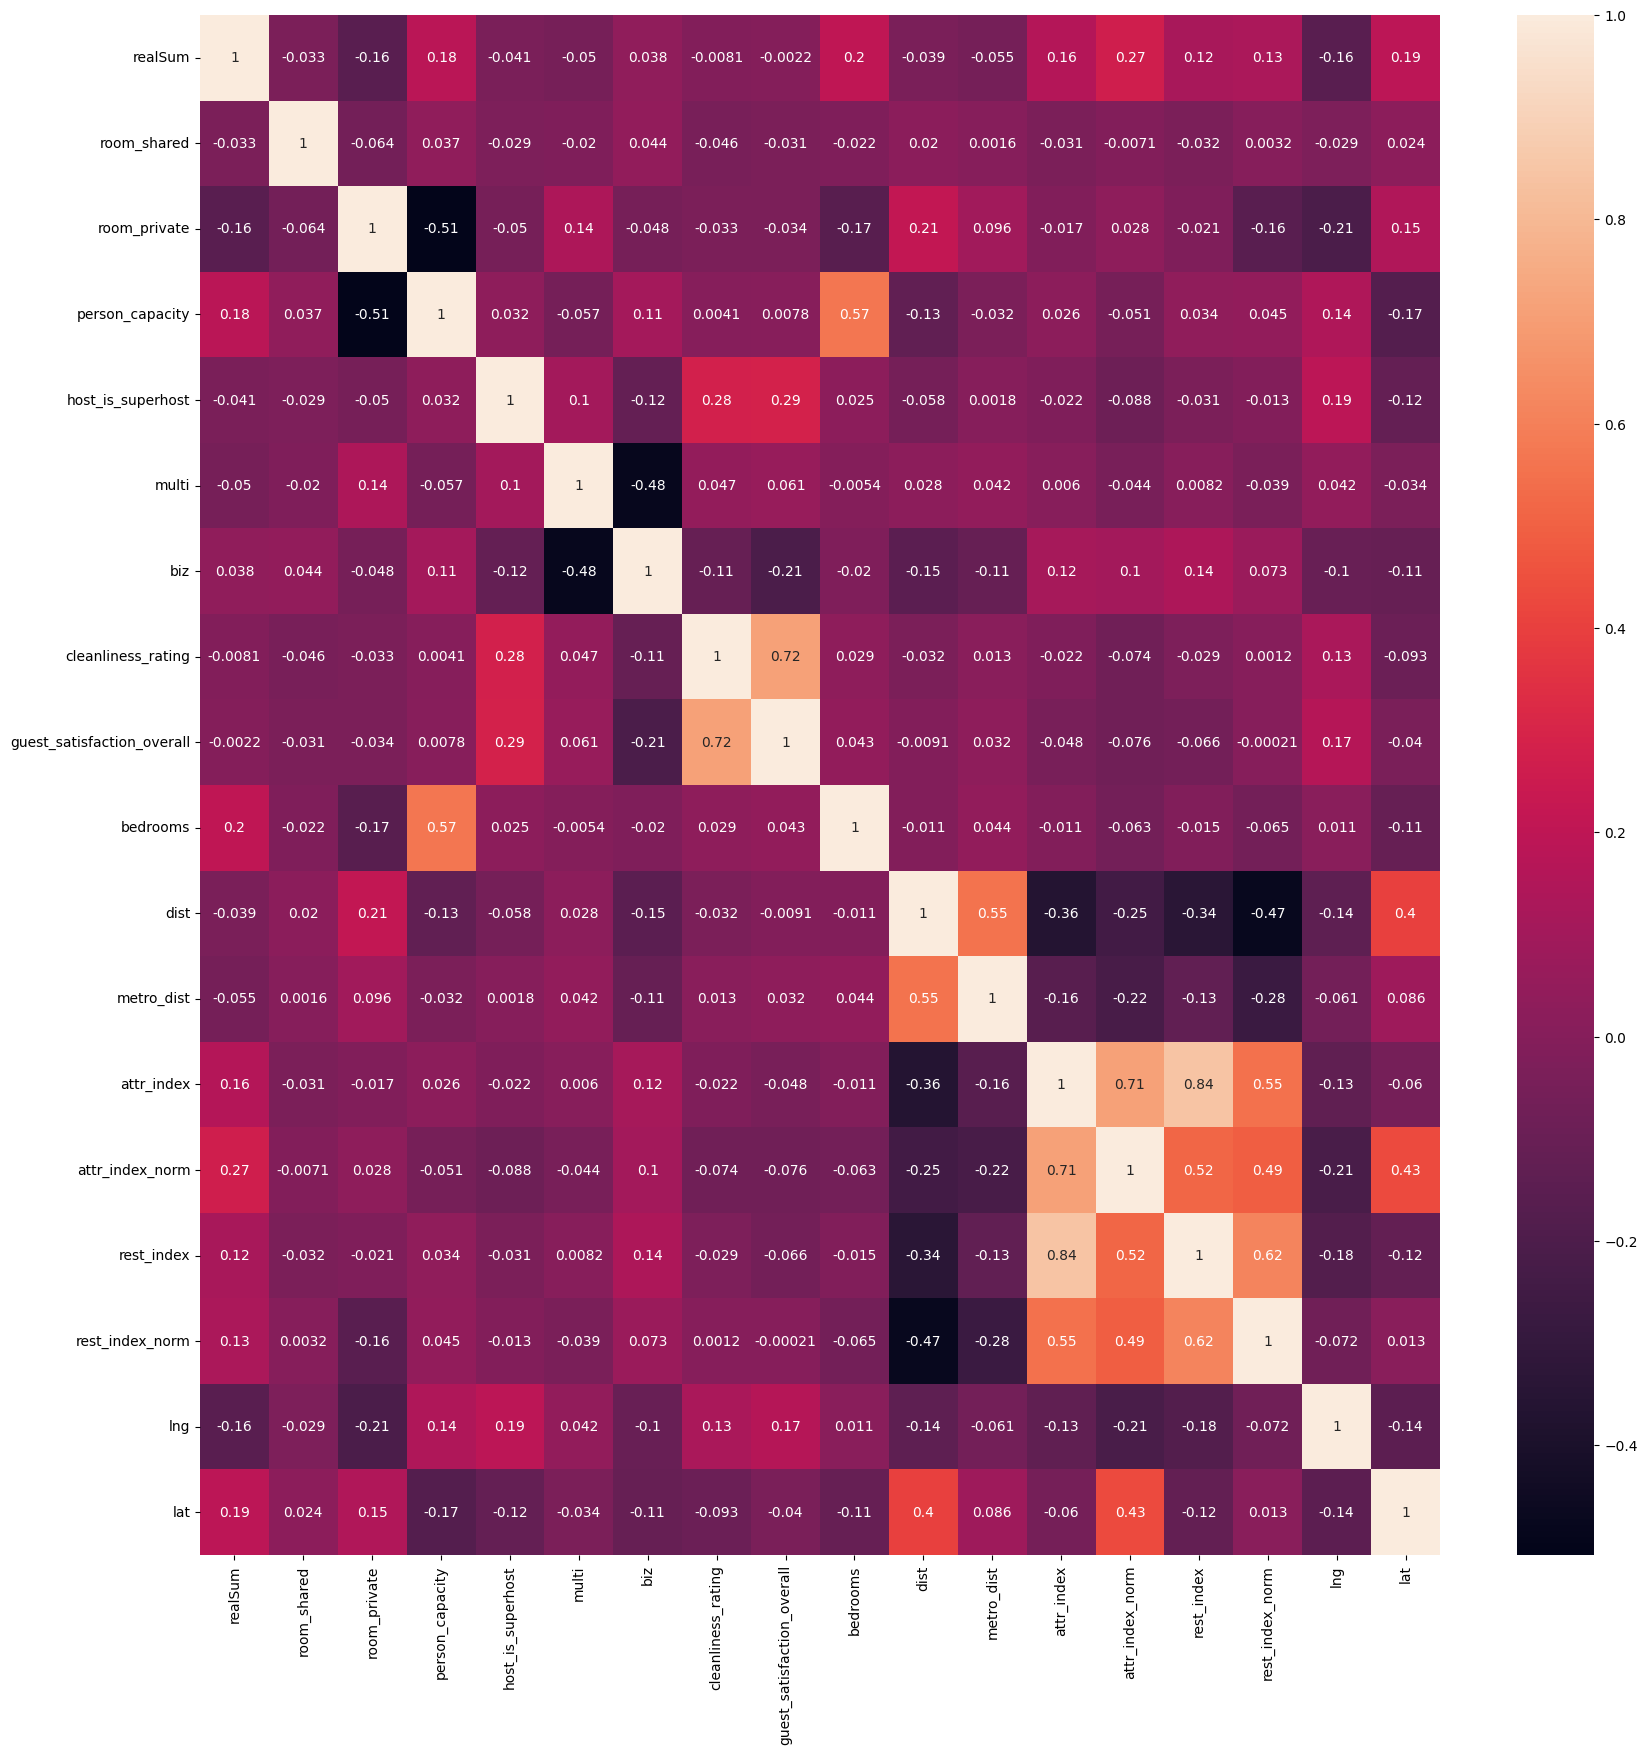

In [215]:
# Correlation matrix
no_categorical = combined_df.drop(columns=['city', 'room_type'])
plt.figure(figsize=(20, 20))
sns.heatmap(no_categorical.corr(), annot=True)
plt.show()

In [216]:
wanted_columns = ['city', 'realSum', 'person_capacity', 'room_type', 'host_is_superhost', 'guest_satisfaction_overall', 'cleanliness_rating', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index']

combined_df = combined_df[wanted_columns]

In [217]:
combined_df.head()

,city,realSum,person_capacity,room_type,host_is_superhost,guest_satisfaction_overall,cleanliness_rating,bedrooms,dist,metro_dist,attr_index,rest_index
0,amsterdam,194.033698,2.0,Private room,False,93.0,10.0,1,5.022964,2.539380,78.690379,98.253896
1,amsterdam,344.245776,4.0,Private room,False,85.0,8.0,1,0.488389,0.239404,631.176378,837.280757
2,amsterdam,264.101422,2.0,Private room,False,87.0,9.0,1,5.748312,3.651621,75.275877,95.386955
3,amsterdam,433.529398,4.0,Private room,False,90.0,9.0,2,0.384862,0.439876,493.272534,875.033098
4,amsterdam,485.552926,2.0,Private room,True,98.0,10.0,1,0.544738,0.318693,552.830324,815.305740


In [218]:
room_type = combined_df['room_type'].value_counts()
print(room_type)

host_is_superhost = combined_df['host_is_superhost'].value_counts()
print(host_is_superhost)

room_type
Entire home/apt    15994
Private room        9326
Shared room          180
Name: count, dtype: int64
host_is_superhost
False    18908
True      6592
Name: count, dtype: int64


In [219]:
# One hot encoding

combined_df['room_type_original'] = combined_df['room_type']
combined_df = pd.get_dummies(combined_df, columns=['room_type'])
combined_df['room_type_hot_code'] = combined_df['room_type_original'].map({
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2
})

combined_df['city_original'] = combined_df['city']
combined_df = pd.get_dummies(combined_df, columns=['city'])

combined_df['city_original_hot_code'] = combined_df['city_original'].map({
    'amsterdam': 0,
    'athens': 1,
    'barcelona': 2,
    'berlin': 3,
    'budapest': 4,
    'lisbon': 5,
    'london': 6,
    'paris': 7,
    'rome': 8,
    'vienna': 9
})

combined_df.head()

,realSum,person_capacity,host_is_superhost,guest_satisfaction_overall,cleanliness_rating,bedrooms,dist,metro_dist,attr_index,rest_index,...,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,city_original_hot_code
0,194.033698,2.0,False,93.0,10.0,1,5.022964,2.539380,78.690379,98.253896,...,False,False,False,False,False,False,False,False,False,0
1,344.245776,4.0,False,85.0,8.0,1,0.488389,0.239404,631.176378,837.280757,...,False,False,False,False,False,False,False,False,False,0
2,264.101422,2.0,False,87.0,9.0,1,5.748312,3.651621,75.275877,95.386955,...,False,False,False,False,False,False,False,False,False,0
3,433.529398,4.0,False,90.0,9.0,2,0.384862,0.439876,493.272534,875.033098,...,False,False,False,False,False,False,False,False,False,0
4,485.552926,2.0,True,98.0,10.0,1,0.544738,0.318693,552.830324,815.305740,...,False,False,False,False,False,False,False,False,False,0


In [220]:
combined_df.columns

Index(['realSum', 'person_capacity', 'host_is_superhost',
       'guest_satisfaction_overall', 'cleanliness_rating', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'rest_index', 'room_type_original',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'room_type_hot_code', 'city_original',
       'city_amsterdam', 'city_athens', 'city_barcelona', 'city_berlin',
       'city_budapest', 'city_lisbon', 'city_london', 'city_paris',
       'city_rome', 'city_vienna', 'city_original_hot_code'],
      dtype='object')

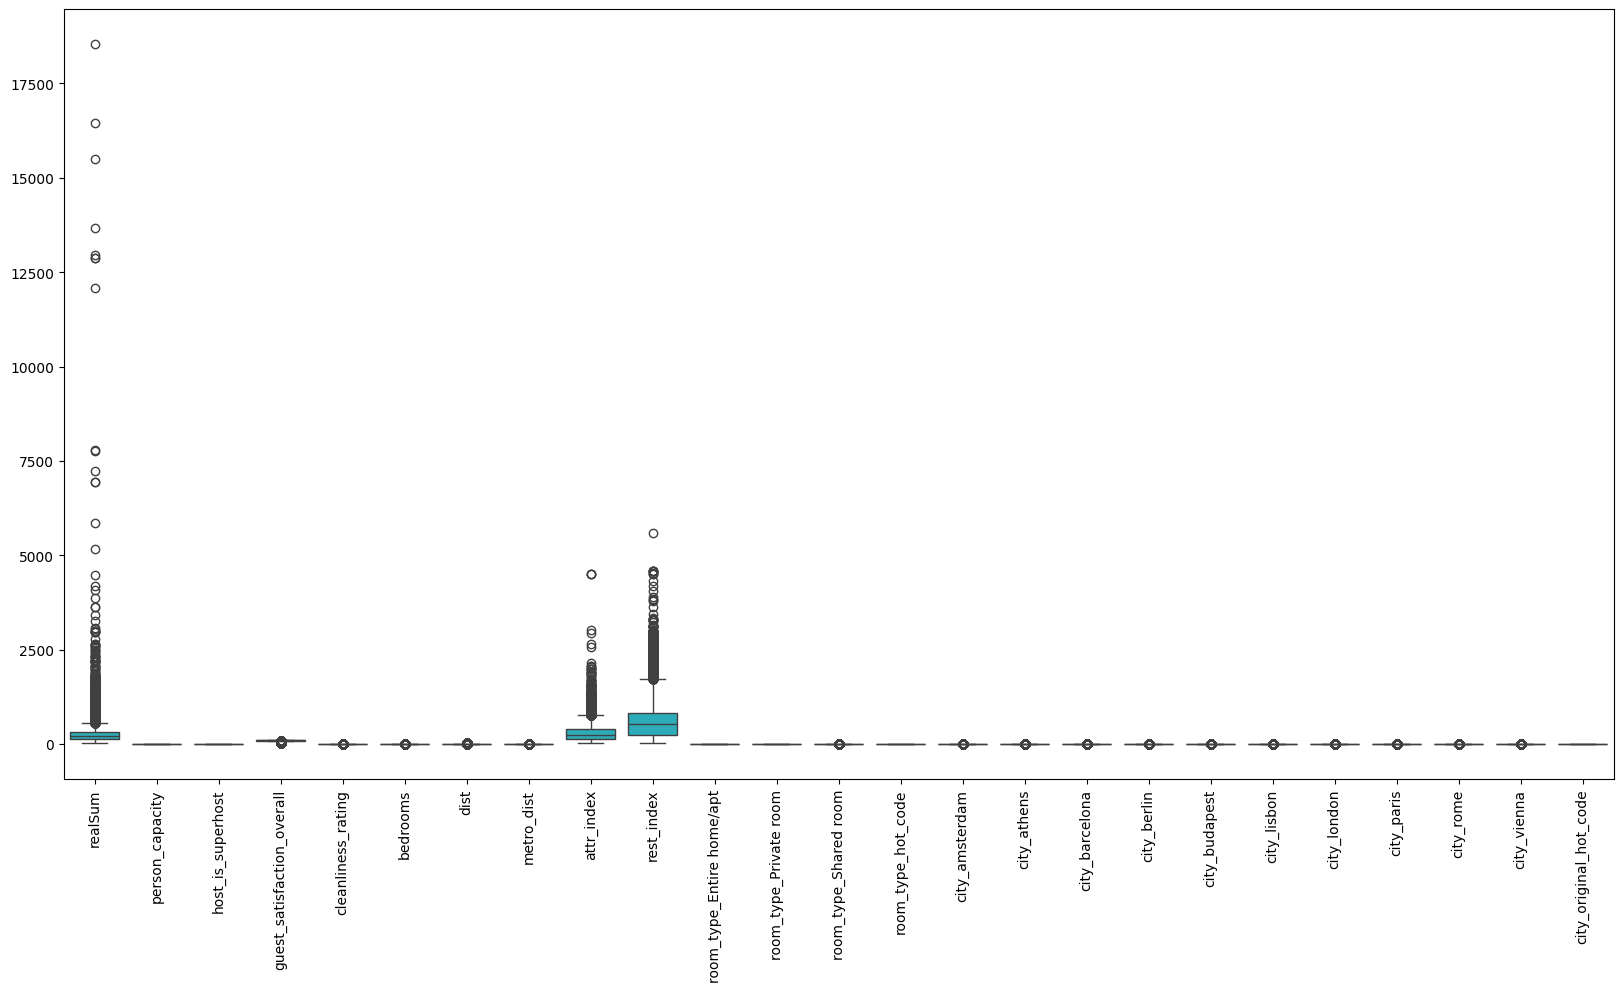

In [221]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=combined_df, color='#17becf')
plt.xticks(rotation=90)
plt.show()

- The plot displays a wide range of values for the realSum category, with numerous outliers indicating extreme prices.
- The categories person_capacity, bedrooms, dist, metro_dist, attr_index, and rest_index show less variability, with attr_index and rest_index displaying some moderate outliers.
- The city, room_type, host_is_superhost, and guest_satisfaction_overall categories appear to have data points that are tightly packed with no visible outliers, which suggests limited variability or a binary/limited range of values.

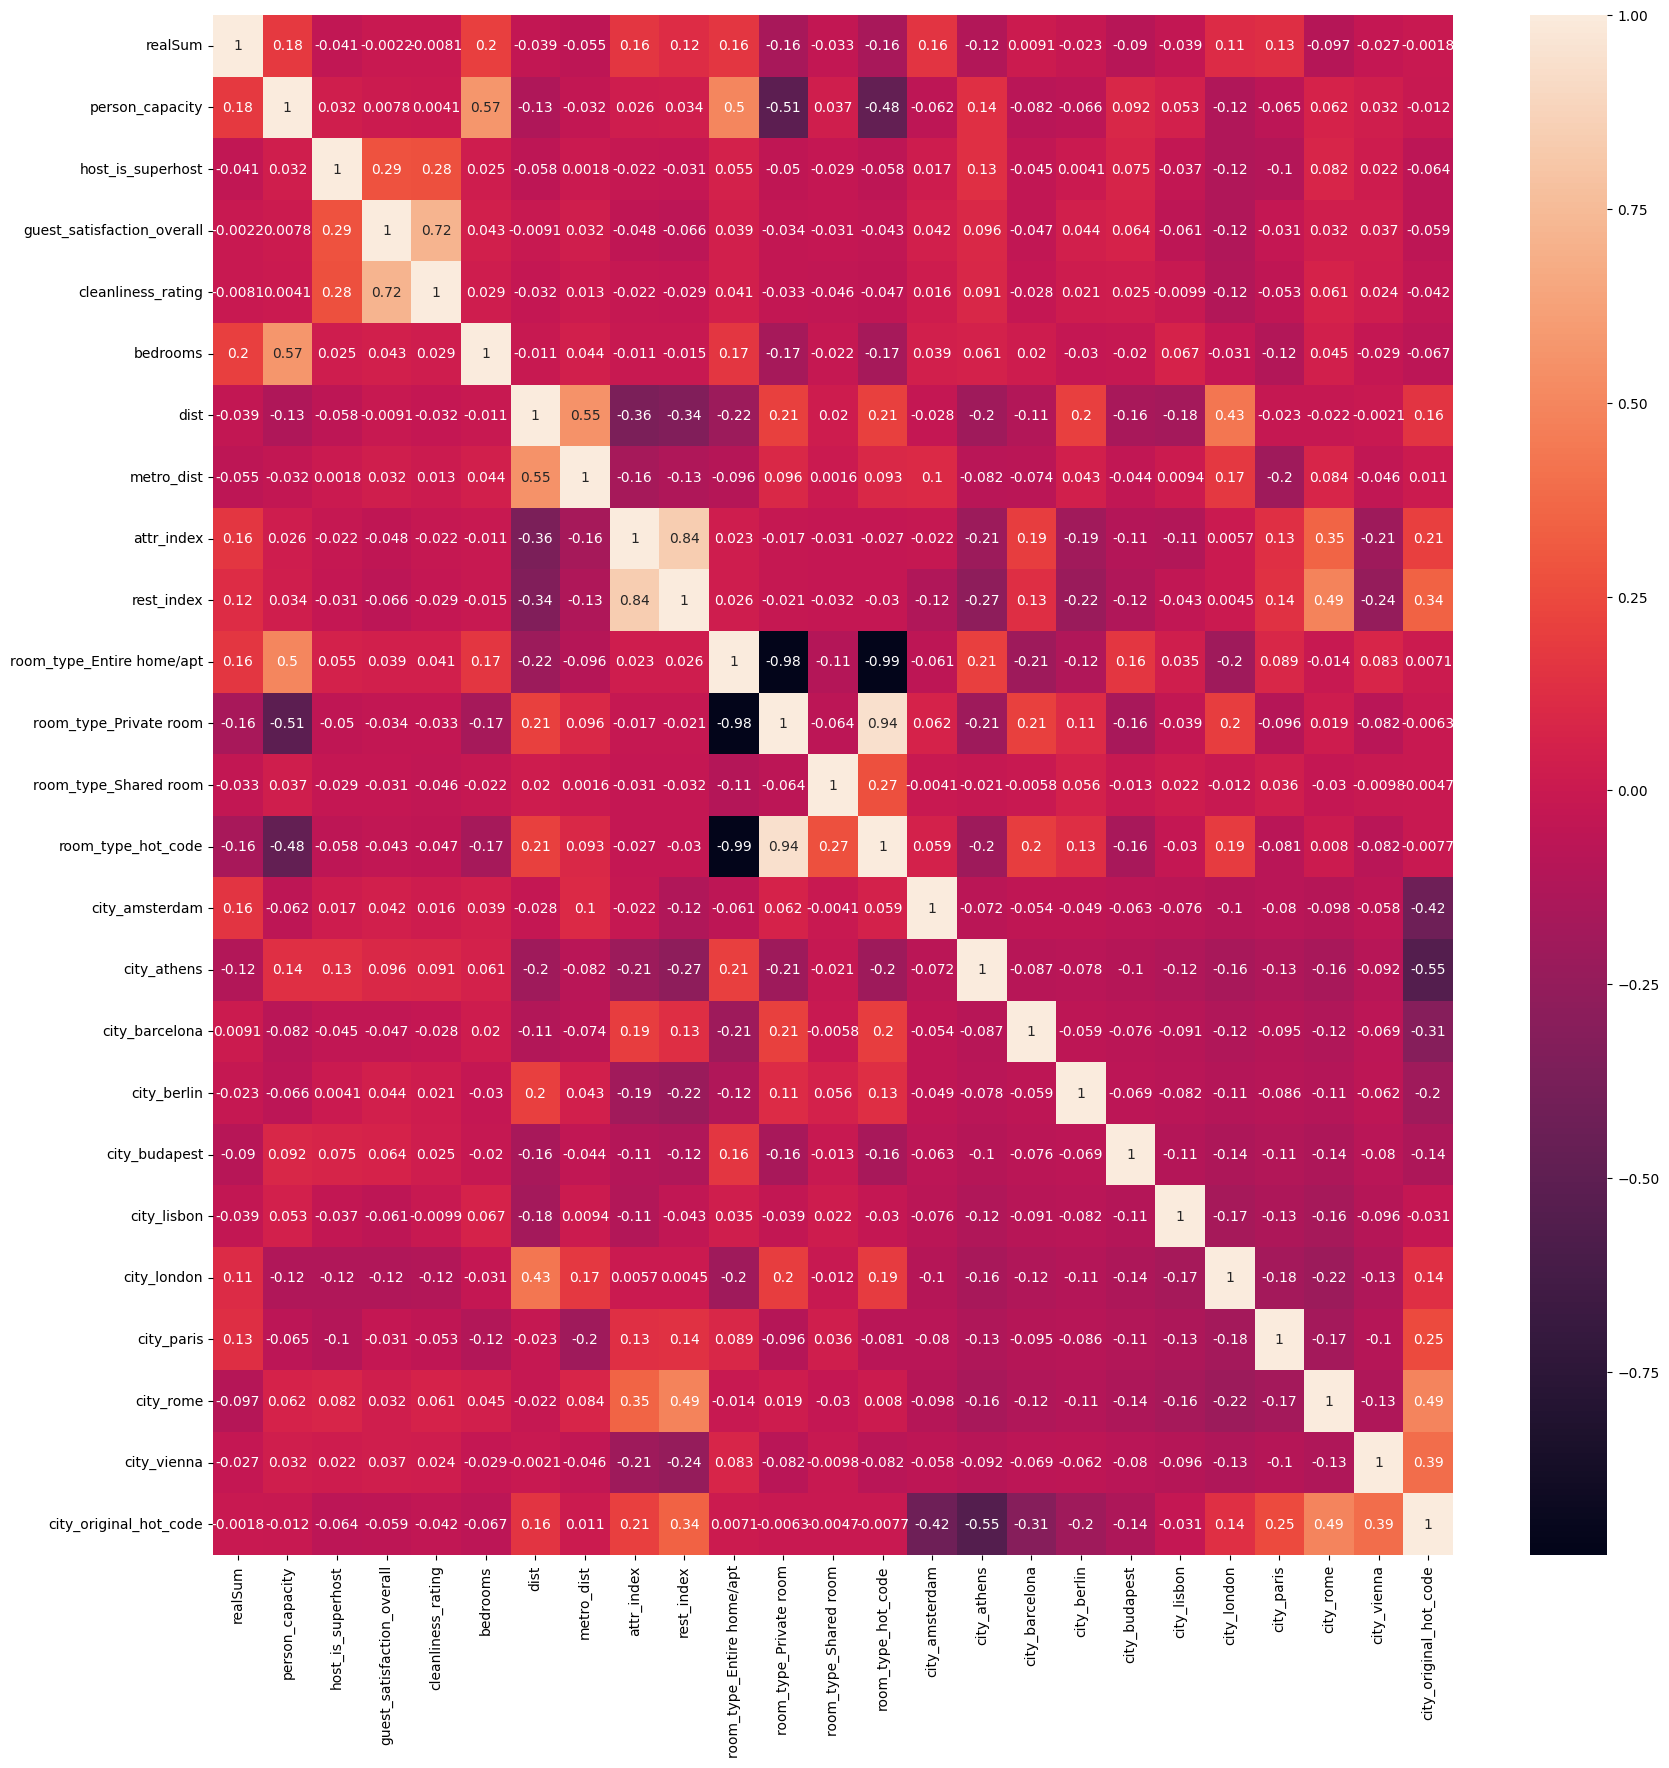

In [222]:
# Correlation matrix
no_categorical = combined_df.drop(columns=['city_original', 'room_type_original'])
plt.figure(figsize=(20, 20))
sns.heatmap(no_categorical.corr(), annot=True)
plt.show()

- The heatmap shows the correlation coefficients between different variables.
- There is a range of correlations from strong positive (close to 1) to strong negative (close to -1).
- Notably, attr_index and rest_index seem to have a high positive correlation with each other, suggesting that as the attraction index increases, the restaurant index tends to increase as well.
- The person_capacity and bedrooms also show a moderate positive correlation, which is expected as larger homes tend to have more bedrooms.

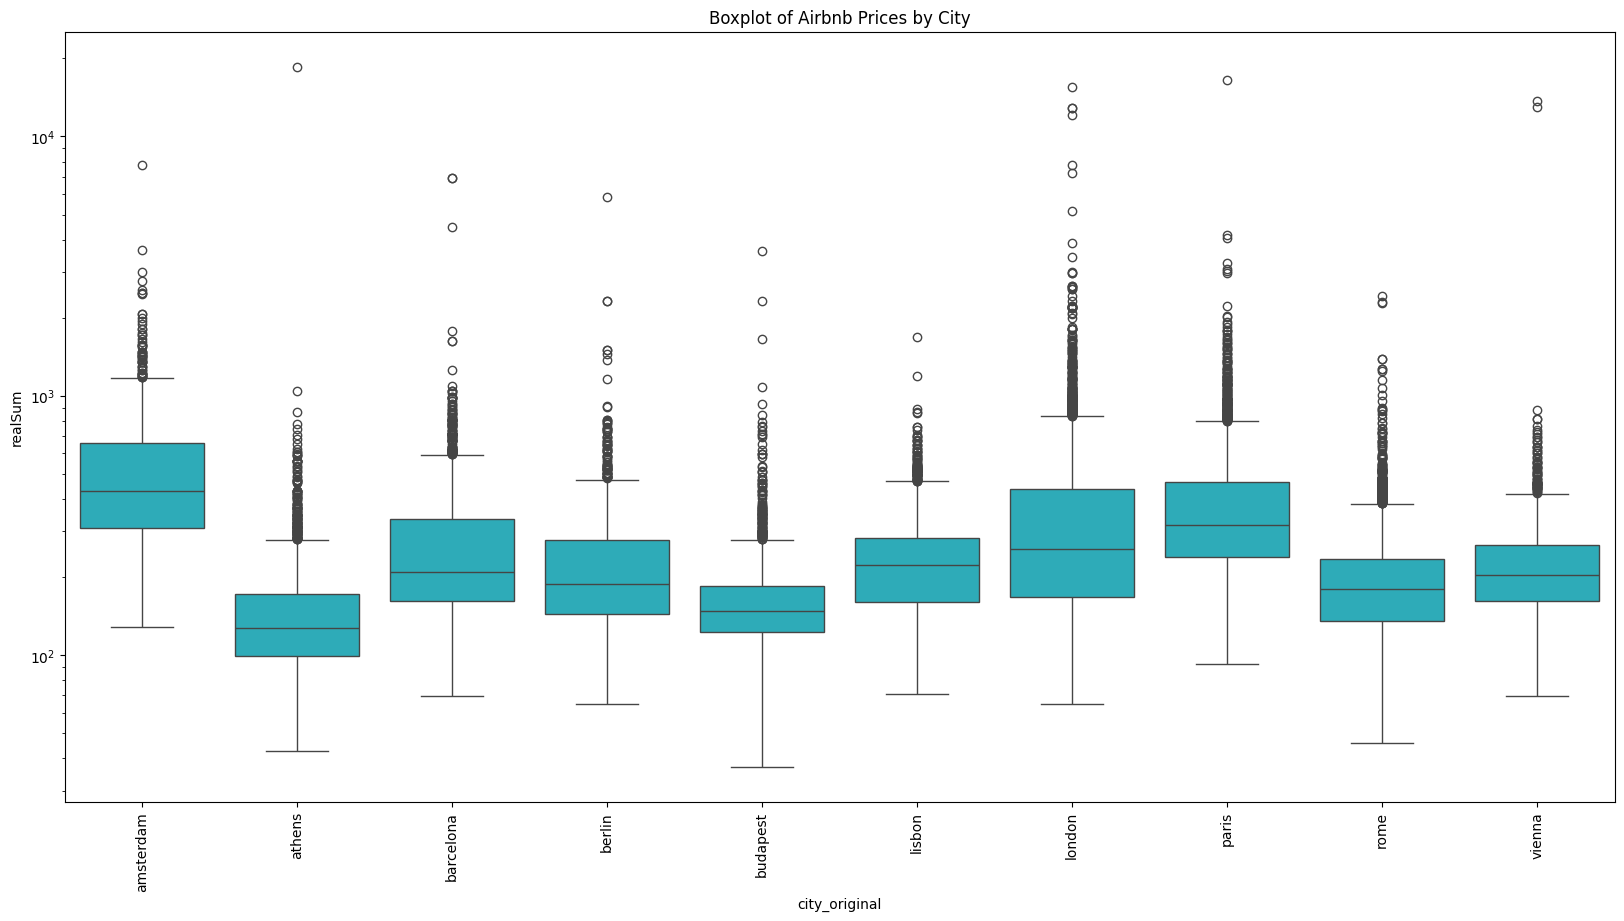

In [223]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='city_original', y='realSum', data=combined_df, color='#17becf')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Boxplot of Airbnb Prices by City')

plt.show()

- The plot reveals the price distribution across different cities, with the median, quartiles, and outliers represented for each city.
- The logarithmic scale helps in comparing the cities more effectively, as it normalizes the wide range of prices.
- Outliers are present in all cities, indicating listings with significantly higher prices than the median.

In [224]:
def remove_outliers(df, column_name): # prompt suggested by Github Copilot
    return df[(df[column_name] >= df[column_name].quantile(0.05)) & (df[column_name] <= df[column_name].quantile(0.95))]

In [225]:
combined_df = combined_df.groupby('city_original').apply(remove_outliers, 'realSum').reset_index(drop=True)

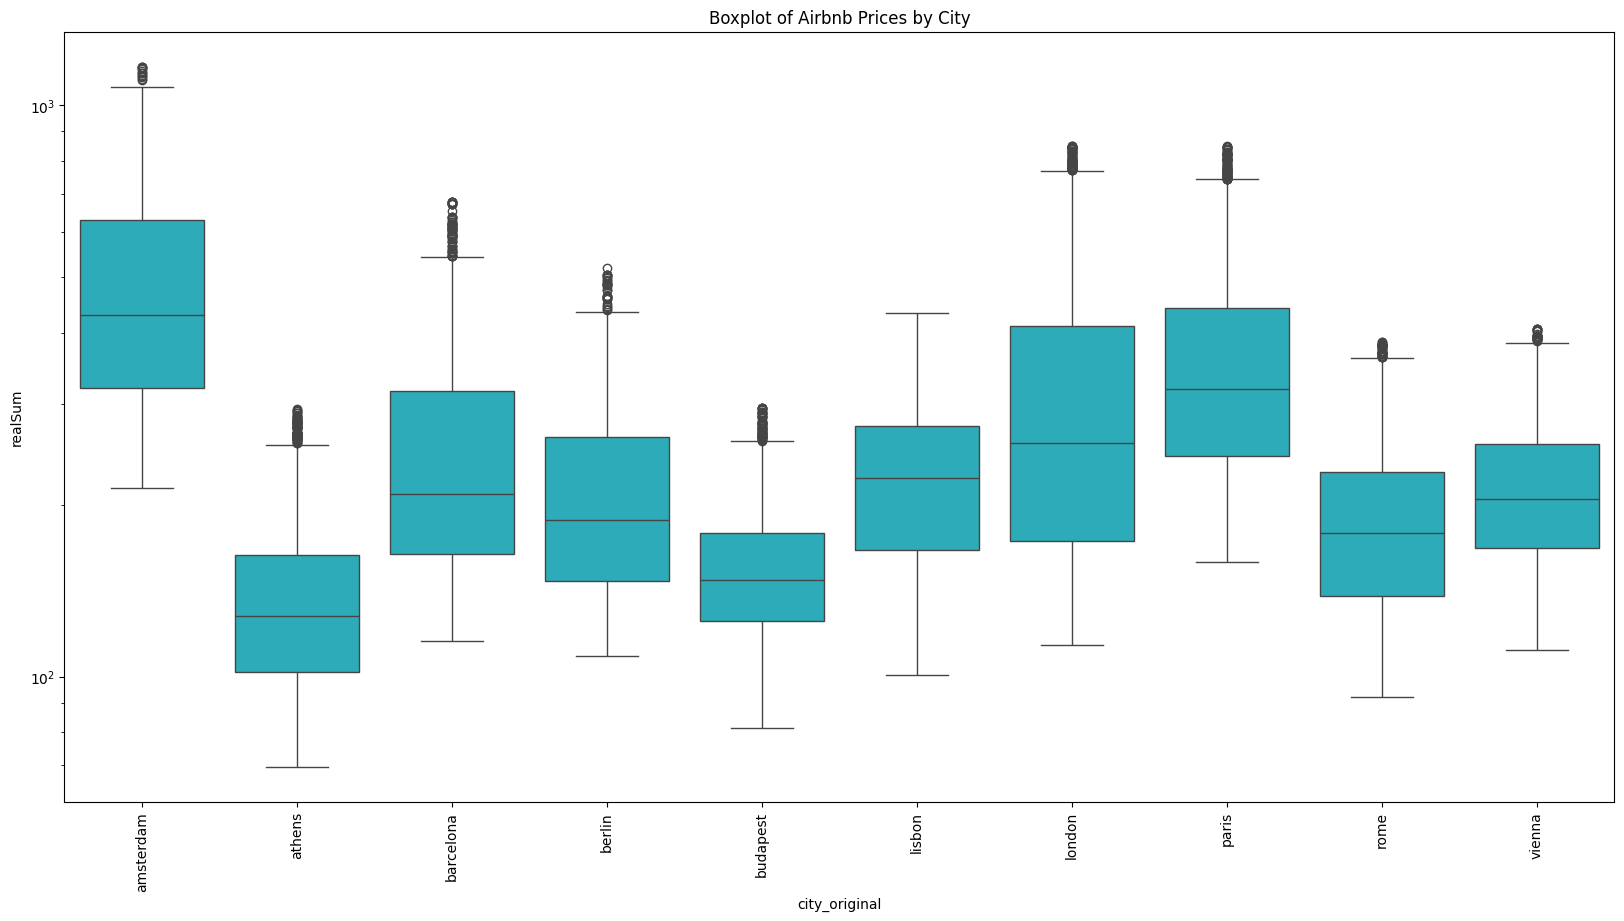

In [226]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='city_original', y='realSum', data=combined_df, color='#17becf')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Boxplot of Airbnb Prices by City')
plt.show()


- Similar to the previous boxplot but with fewer extreme outliers, showing that some price outliers have been removed.
- The median and quartile ranges for each city remain visible, providing insight into the central tendency and spread of prices after cleaning the data.

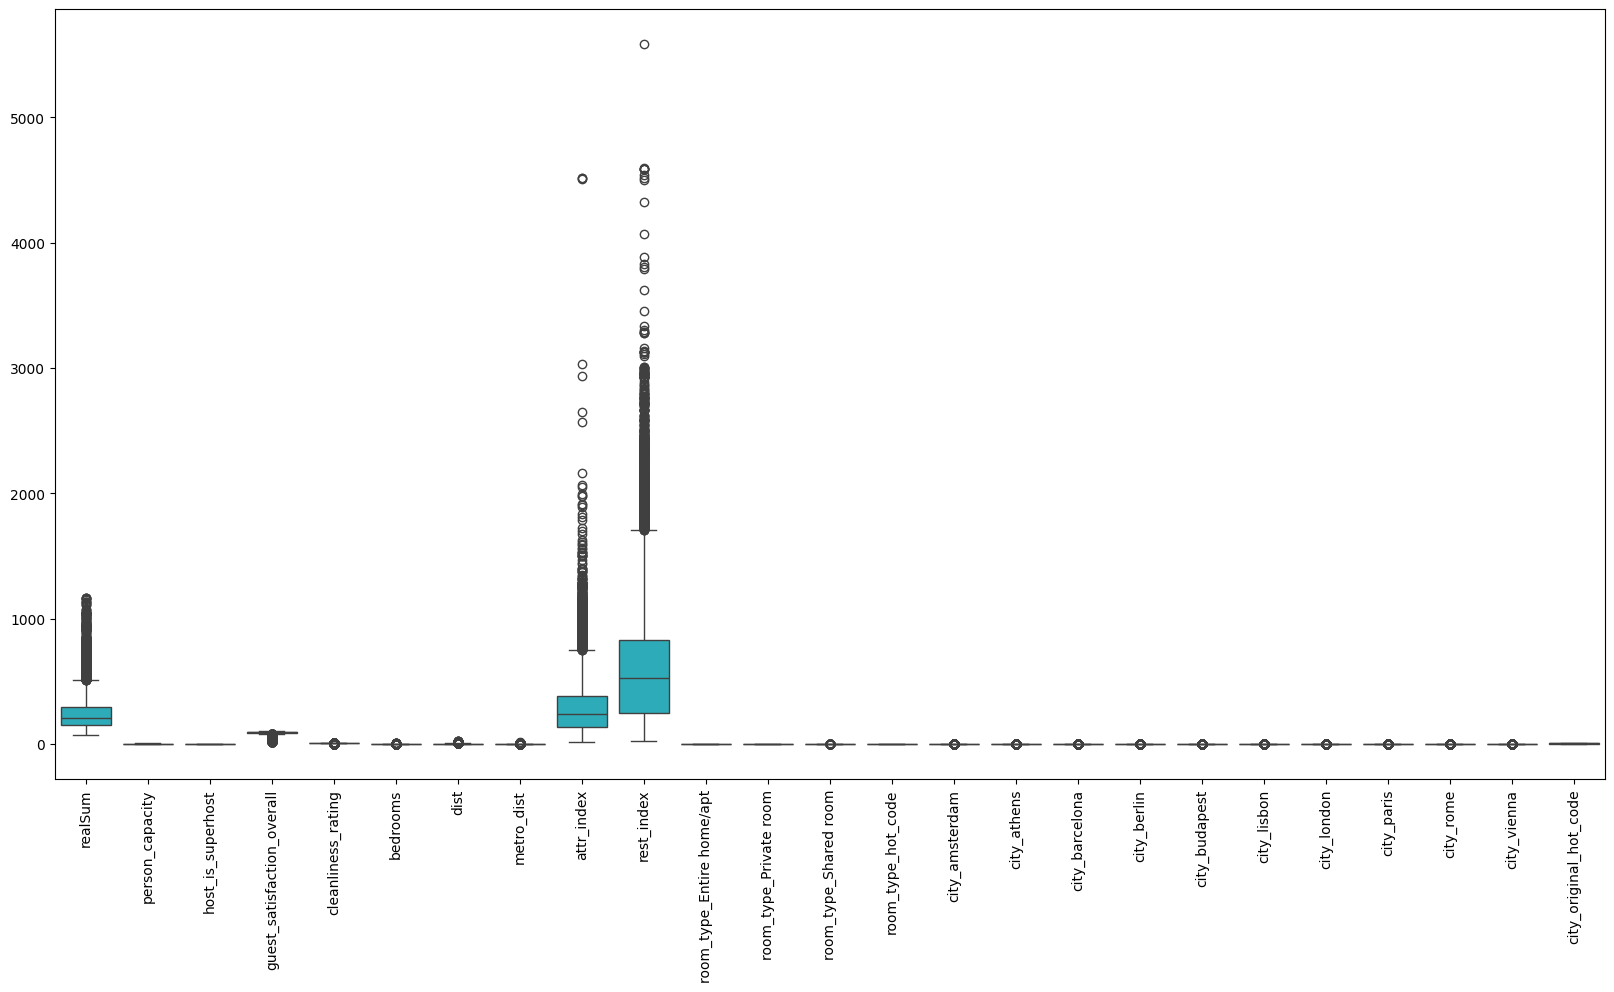

In [227]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=combined_df, color='#17becf')
plt.xticks(rotation=90)
plt.show()

- This plot shows a cleaner representation with fewer outliers compared to the initial boxplot, particularly in the attr_index and rest_index categories.
- The range of values in realSum is notably reduced, indicating that outlier prices have been removed.

In [228]:
combined_df = combined_df.groupby('city_original').apply(remove_outliers, 'attr_index').reset_index(drop=True)
combined_df = combined_df.groupby('city_original').apply(remove_outliers, 'rest_index').reset_index(drop=True)

In [229]:
# Check city count
city_count = combined_df['city_original'].value_counts()
print(city_count)

city_original
london       3368
rome         3304
paris        2282
lisbon       2102
athens       1948
budapest     1512
vienna       1268
barcelona    1134
berlin        934
amsterdam     801
Name: count, dtype: int64


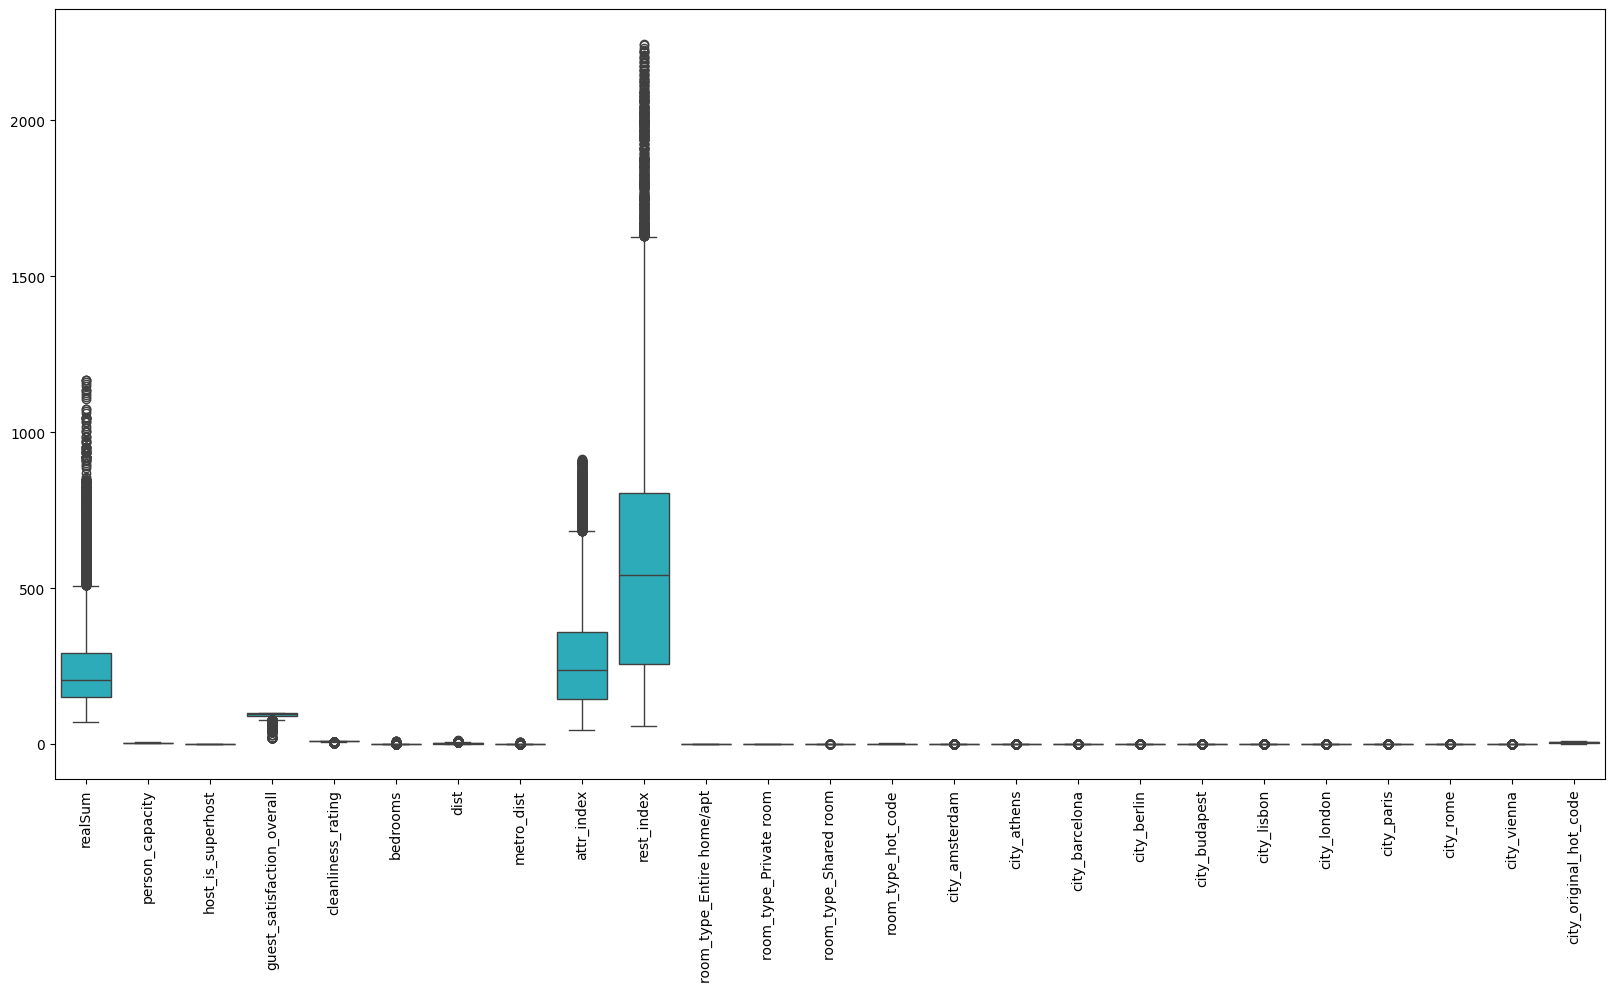

In [230]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=combined_df, color='#17becf')
plt.xticks(rotation=90)
plt.show()

- The plot shows that after further cleaning, the attr_index and rest_index categories now have fewer extreme values, reducing the potential impact of these outliers on subsequent analysis.

In [231]:
combined_df.shape

(18653, 27)

## Multivariate Analysis

In [232]:
import numpy as np

In [233]:
combined_df.columns

Index(['realSum', 'person_capacity', 'host_is_superhost',
       'guest_satisfaction_overall', 'cleanliness_rating', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'rest_index', 'room_type_original',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'room_type_hot_code', 'city_original',
       'city_amsterdam', 'city_athens', 'city_barcelona', 'city_berlin',
       'city_budapest', 'city_lisbon', 'city_london', 'city_paris',
       'city_rome', 'city_vienna', 'city_original_hot_code'],
      dtype='object')

In [234]:
independant_variables = ['person_capacity','guest_satisfaction_overall','bedrooms','dist', 'metro_dist', 'host_is_superhost', 'cleanliness_rating', 'attr_index', 'rest_index', 'city_amsterdam',	'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna','room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'room_type_original']
dependent_variables = ['realSum']

plotting_df = combined_df[independant_variables + dependent_variables]
plotting_df.head()

,person_capacity,guest_satisfaction_overall,bedrooms,dist,metro_dist,host_is_superhost,cleanliness_rating,attr_index,rest_index,city_amsterdam,...,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_original,realSum
0,3.0,100.0,2,2.131420,1.904668,False,8.0,174.788957,225.201662,True,...,False,False,False,False,False,False,True,False,Private room,552.808567
1,2.0,94.0,1,1.881092,0.729747,False,10.0,200.167652,242.765524,True,...,False,False,False,False,False,False,True,False,Private room,215.124317
2,4.0,96.0,2,3.719141,1.196112,False,9.0,106.226456,133.876202,True,...,False,False,False,False,False,True,False,False,Entire home/apt,1001.804420
3,2.0,88.0,1,3.142361,0.924404,False,10.0,206.252862,238.291258,True,...,False,False,False,False,False,False,True,False,Private room,276.521454
4,2.0,96.0,1,1.009922,0.917115,False,10.0,409.858124,555.114276,True,...,False,False,False,False,False,True,False,False,Entire home/apt,909.474375


/tmp/ipykernel_1238/2255595560.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_vals, trend_line(x_vals), "r--", color=trend_color, linewidth=2)


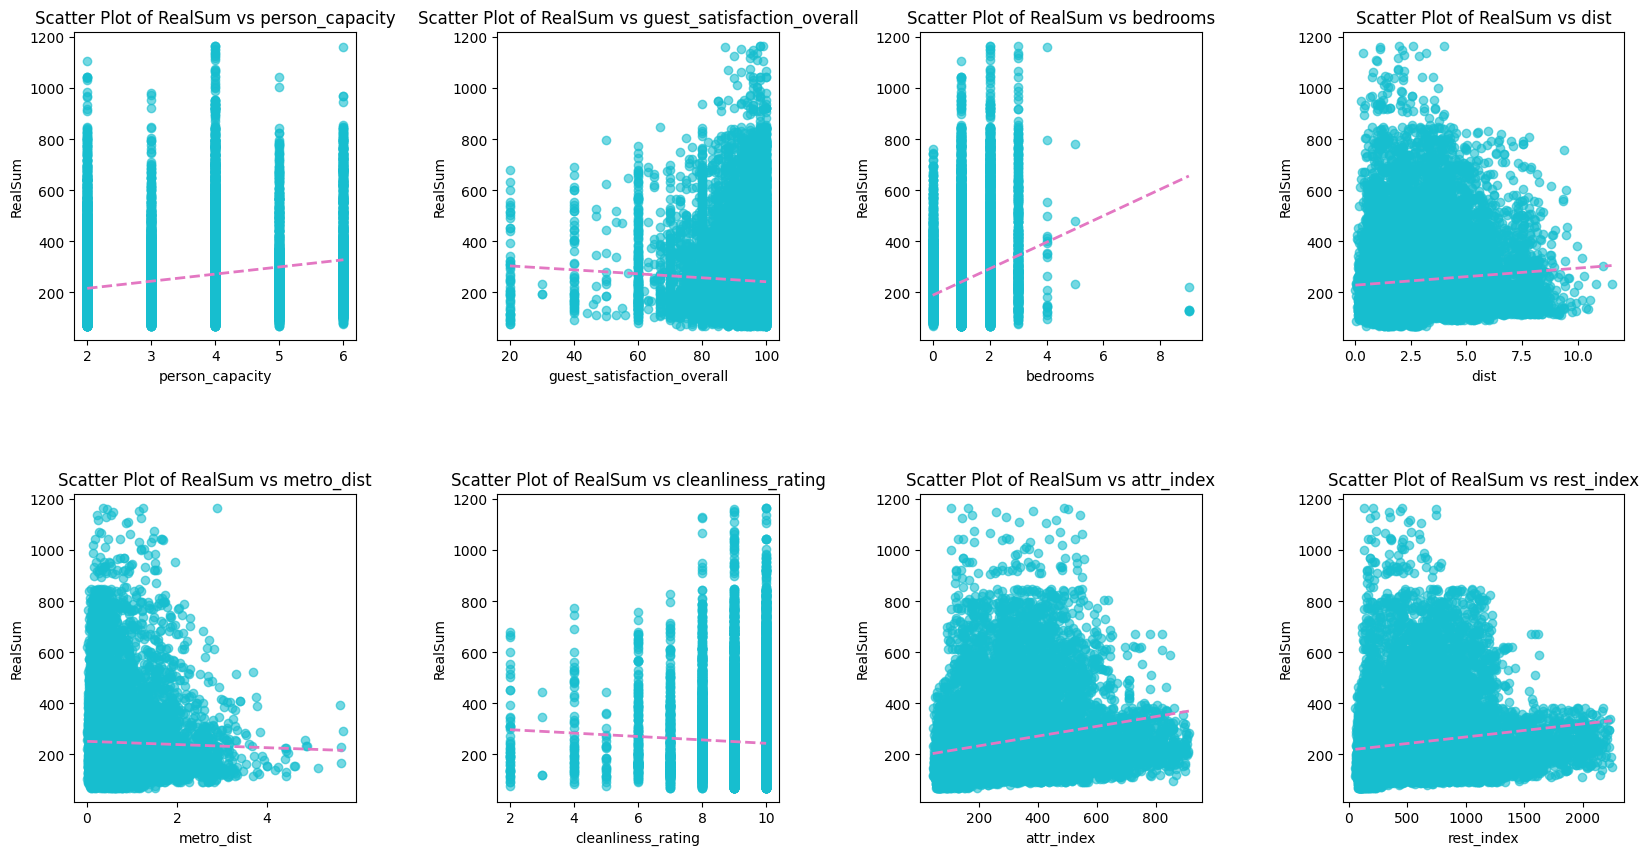

In [235]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def scatter_plots_with_trends(data, features, figsize=(20, 10)):
    filtered_features = [feature for feature in features if not feature.startswith(('city_', 'room_type_','host_is_superhost'))]

    num_features = len(filtered_features)
    cols = 4
    rows = (num_features + cols - 1) // cols

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    axes = axes.flatten()

    point_color = '#17becf'  
    trend_color = '#e377c2'  

    for i, feature in enumerate(filtered_features):
        ax = axes[i]
        if feature in data.columns and pd.to_numeric(data[feature], errors='coerce').notnull().all():
            numeric_data = pd.to_numeric(data[feature], errors='coerce')
            valid_indices = numeric_data.notnull() & data["realSum"].notnull()

            ax.scatter(x=numeric_data[valid_indices], y=data["realSum"][valid_indices], c=point_color, alpha=0.6)

            if valid_indices.any():
                coefficients = np.polyfit(numeric_data[valid_indices], data["realSum"][valid_indices], 1)
                trend_line = np.poly1d(coefficients)
                x_vals = np.linspace(numeric_data[valid_indices].min(), numeric_data[valid_indices].max(), 100)
                ax.plot(x_vals, trend_line(x_vals), "r--", color=trend_color, linewidth=2)
            ax.set_title(f"Scatter Plot of RealSum vs {feature}")
        else:
            ax.text(0.5, 0.5, "No valid data", horizontalalignment='center', verticalalignment='center')
        ax.set_xlabel(feature)
        ax.set_ylabel("RealSum")

    for j in range(i + 1, rows * cols):
        axes[j].axis('off')

    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

scatter_plots_with_trends(plotting_df, independant_variables)


/tmp/ipykernel_1238/3140475217.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(city_names, rotation=45)


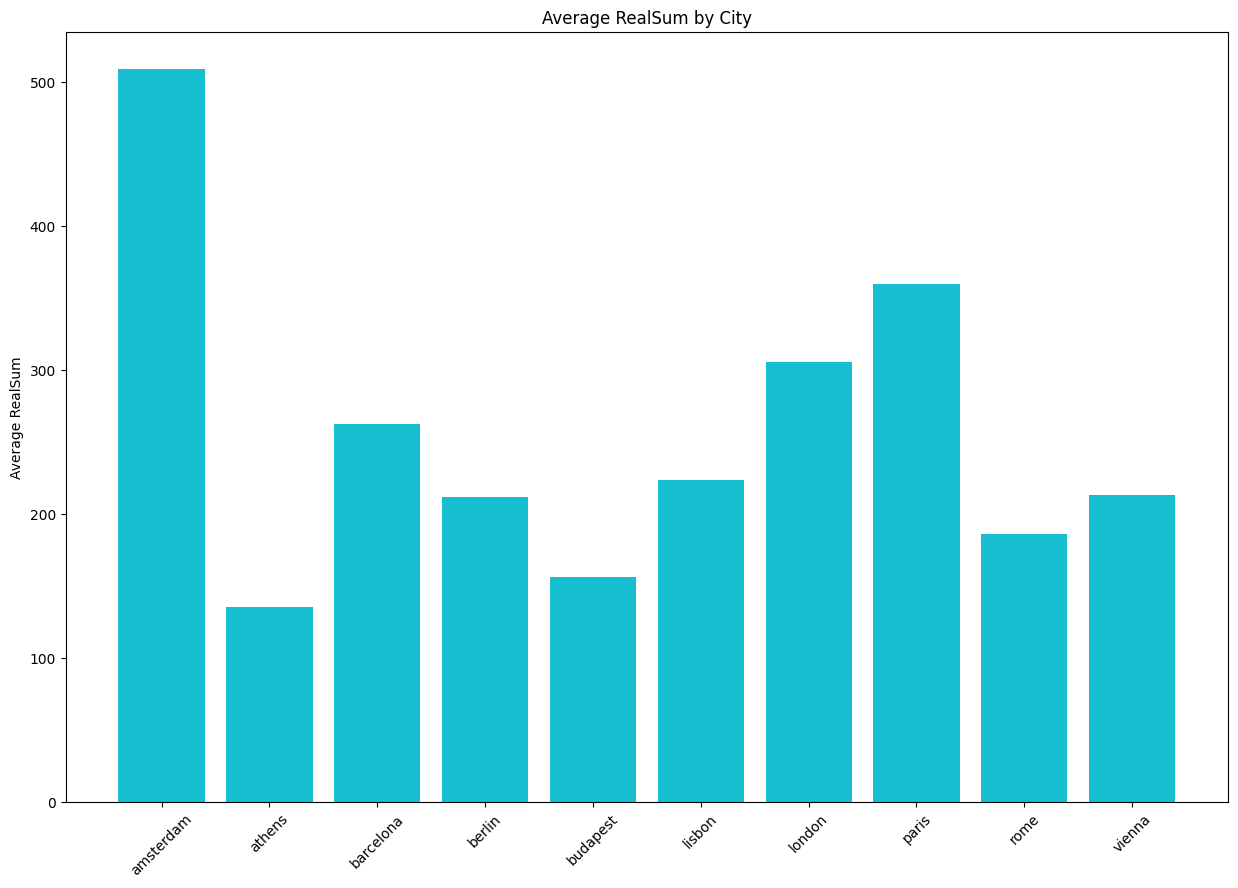

In [236]:
import matplotlib.pyplot as plt
import numpy as np

def create_city_barcharts(data, city_columns, figsize=(15, 10)):
    city_means = {city: data[data[city] == 1]['realSum'].mean() for city in city_columns}
    city_names = [city.split('_')[1] for city in city_columns]
    means = [city_means[city] for city in city_columns]

    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(city_names, means, color='#17becf')
    ax.set_ylabel('Average RealSum')
    ax.set_title('Average RealSum by City')
    ax.set_xticklabels(city_names, rotation=45)
    plt.show()

# Example usage
city_columns = [col for col in plotting_df.columns if 'city_' in col]
create_city_barcharts(plotting_df, city_columns)


In [237]:
import matplotlib.pyplot as plt

def plot_barchart(data, column, title, x_label, y_label):
    room_type_means = data.groupby(column)['realSum'].mean()

    plt.figure(figsize=(10, 6))
    room_type_means.plot(kind='bar', color='#17becf')
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


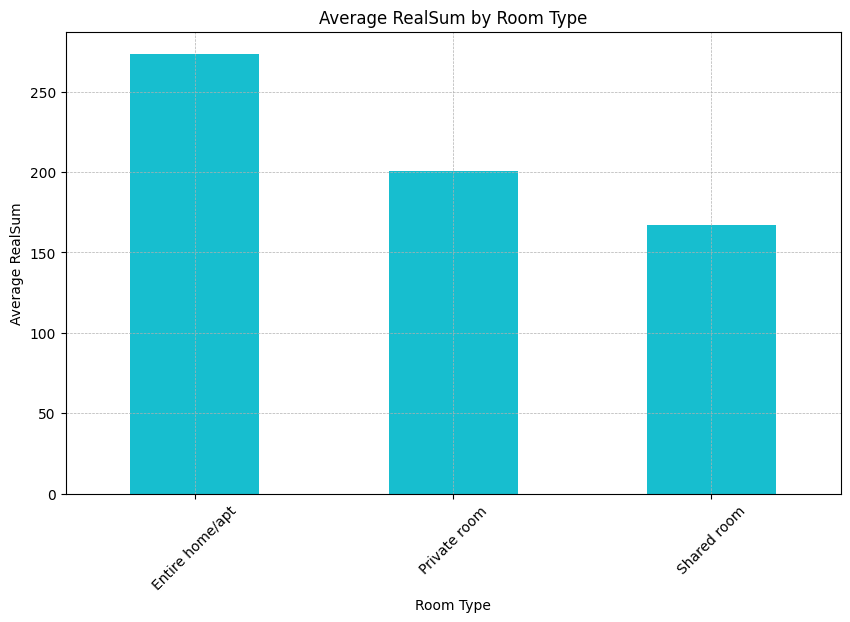

In [238]:
plot_barchart(plotting_df, 'room_type_original', 'Average RealSum by Room Type', 'Room Type', 'Average RealSum')

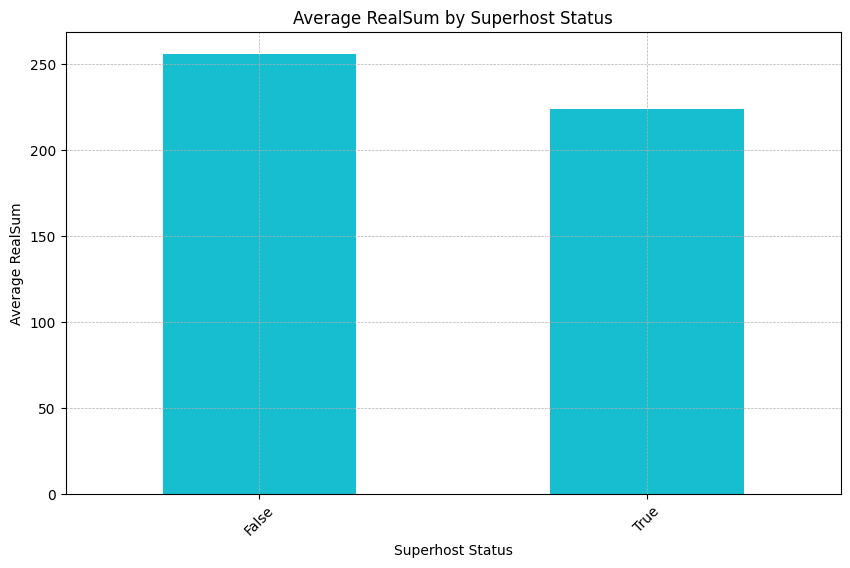

In [239]:
plot_barchart(plotting_df, 'host_is_superhost', 'Average RealSum by Superhost Status', 'Superhost Status', 'Average RealSum')

In [240]:
# Asked ChatGPT for a function to plot scatter plot with the mean of realSum and cities
# As a response it suggested the following code which I modified into a function

def plot_by_average_realSum_scatter_plot(x, title, x_label):
    city_grouped = combined_df.groupby(x)['realSum'].mean().reset_index()
    
    plt.figure(figsize=(20, 10))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel("Average realSum")

    city_codes = city_grouped[x].astype('category').cat.codes

    plt.scatter(city_codes, city_grouped['realSum'], label='Average realSum', color='#17becf')

    coefficients = np.polyfit(city_codes, city_grouped['realSum'], 1)
    polynomial = np.poly1d(coefficients)

    plt.plot(city_codes, polynomial(city_codes), color='#e377c2', label='Trend Line')
    plt.legend()
    plt.xticks(city_codes, city_grouped[x], rotation='vertical')
    plt.tight_layout()

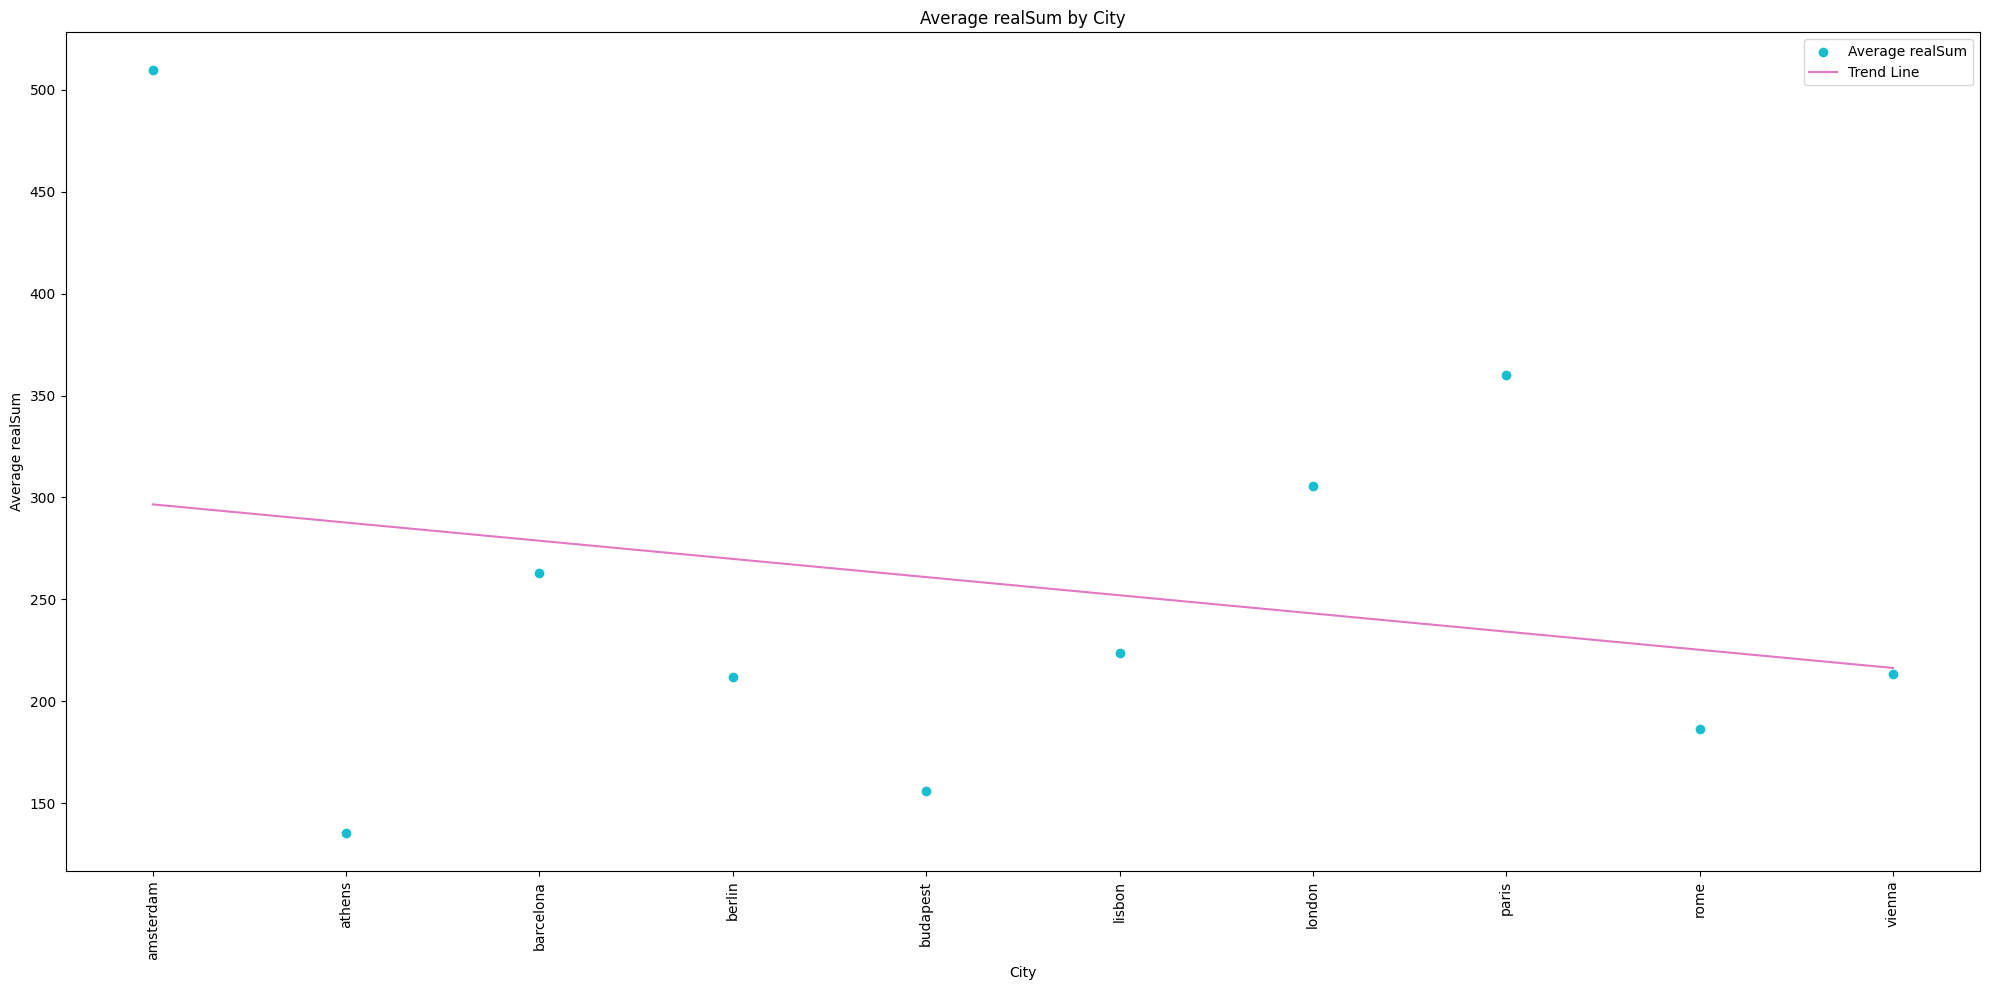

In [241]:
plot_by_average_realSum_scatter_plot('city_original', 'Average realSum by City', 'City')

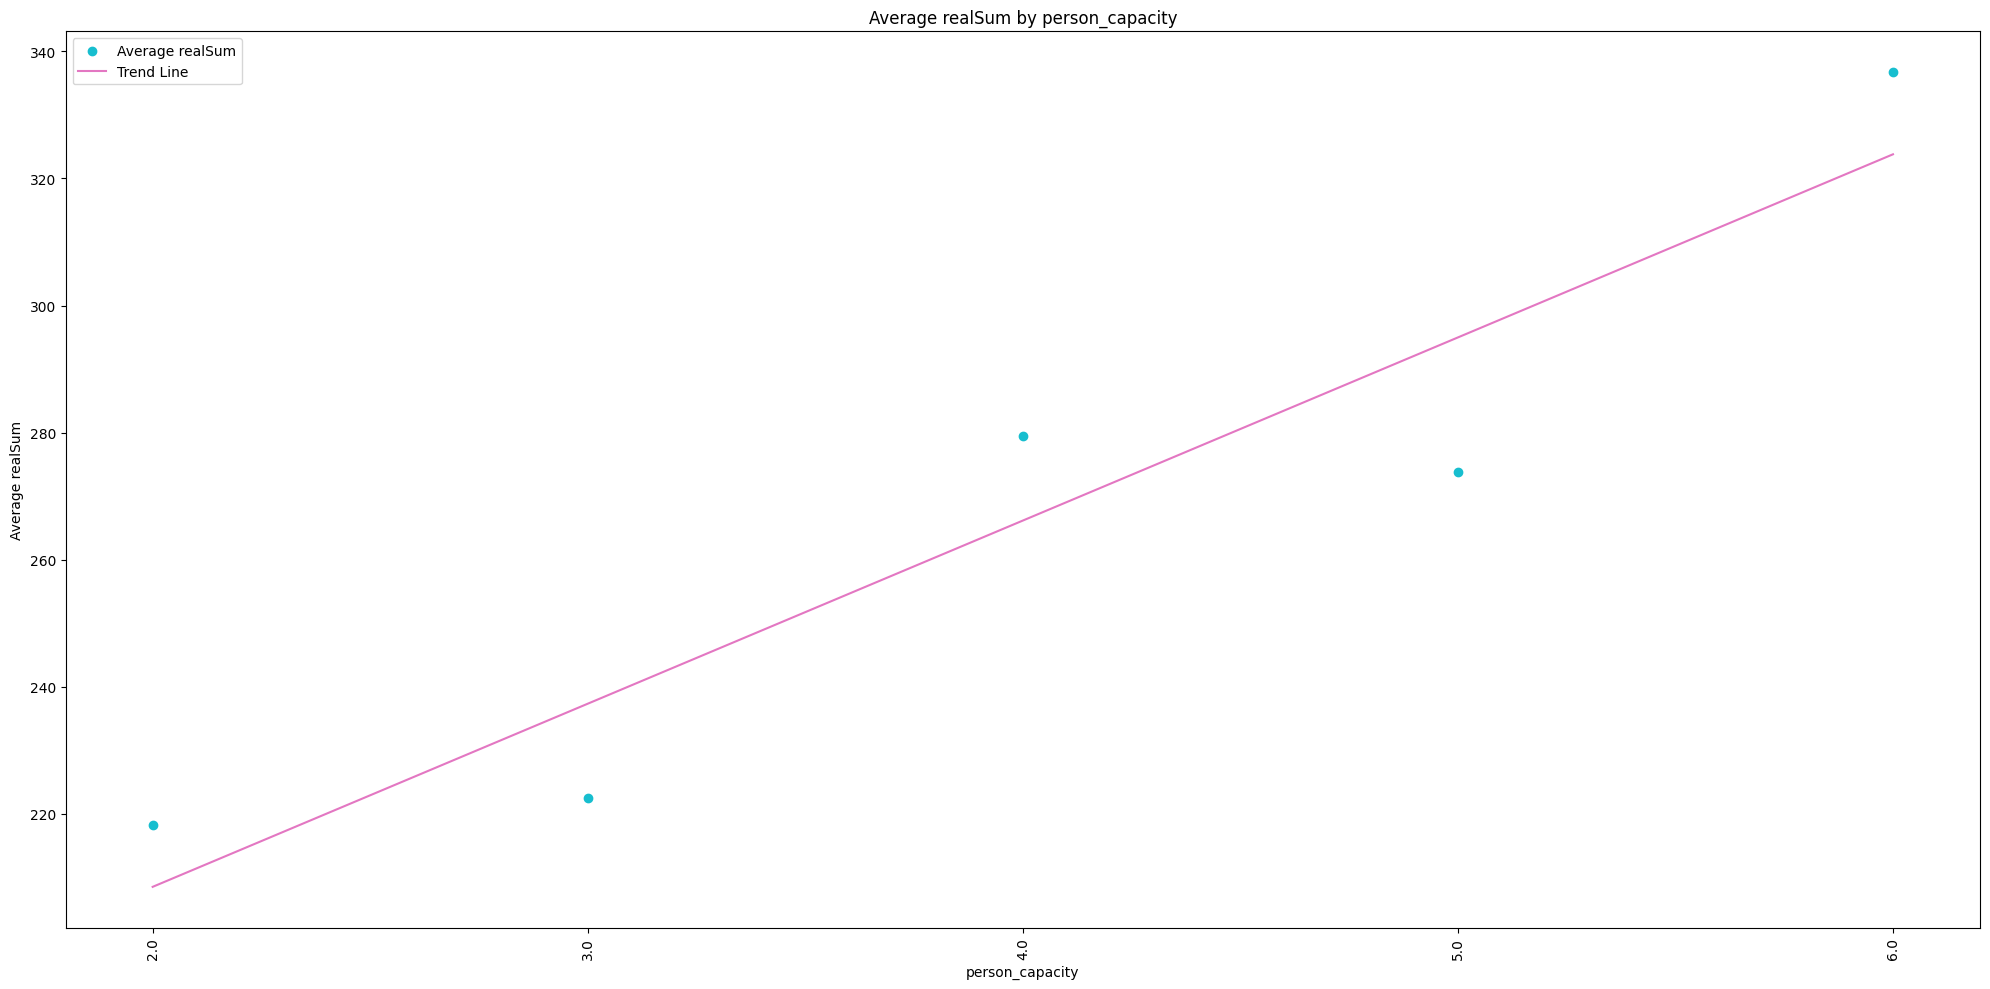

In [242]:
plot_by_average_realSum_scatter_plot('person_capacity', 'Average realSum by person_capacity', 'person_capacity')

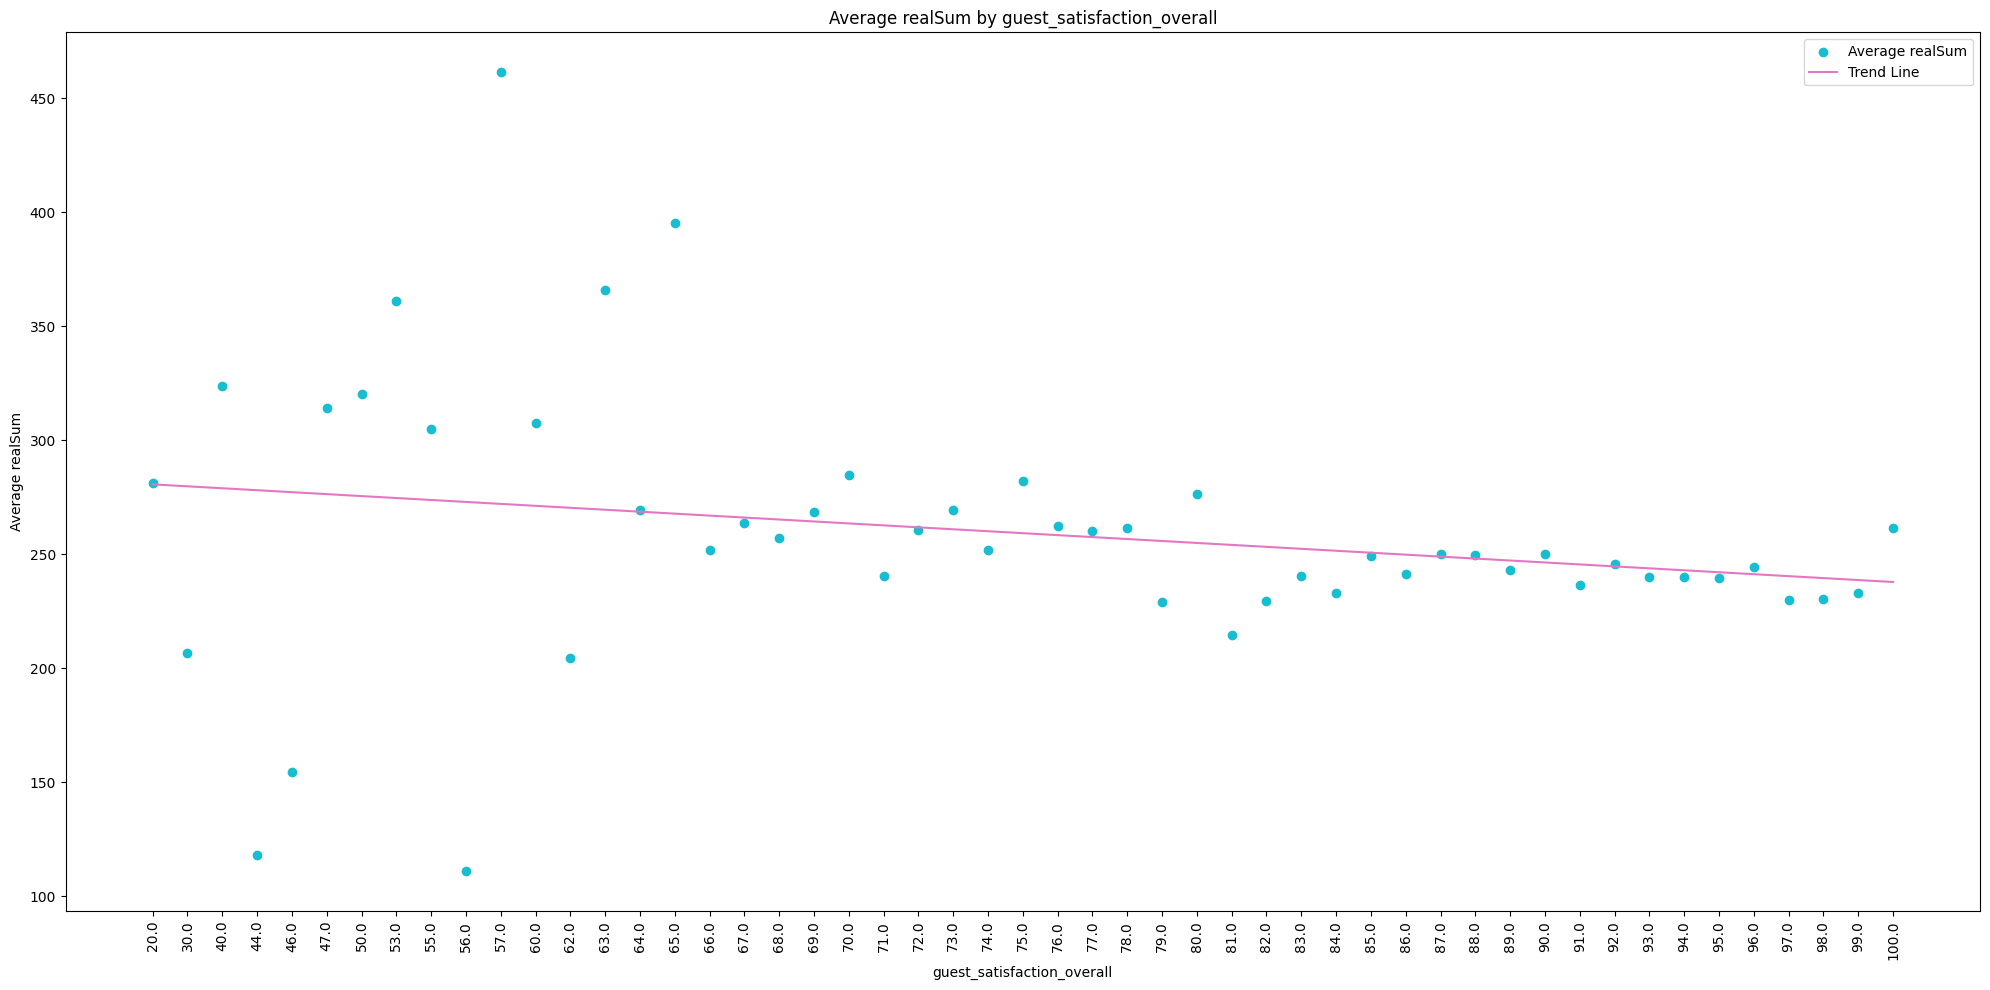

In [243]:
plot_by_average_realSum_scatter_plot('guest_satisfaction_overall', 'Average realSum by guest_satisfaction_overall', 'guest_satisfaction_overall')

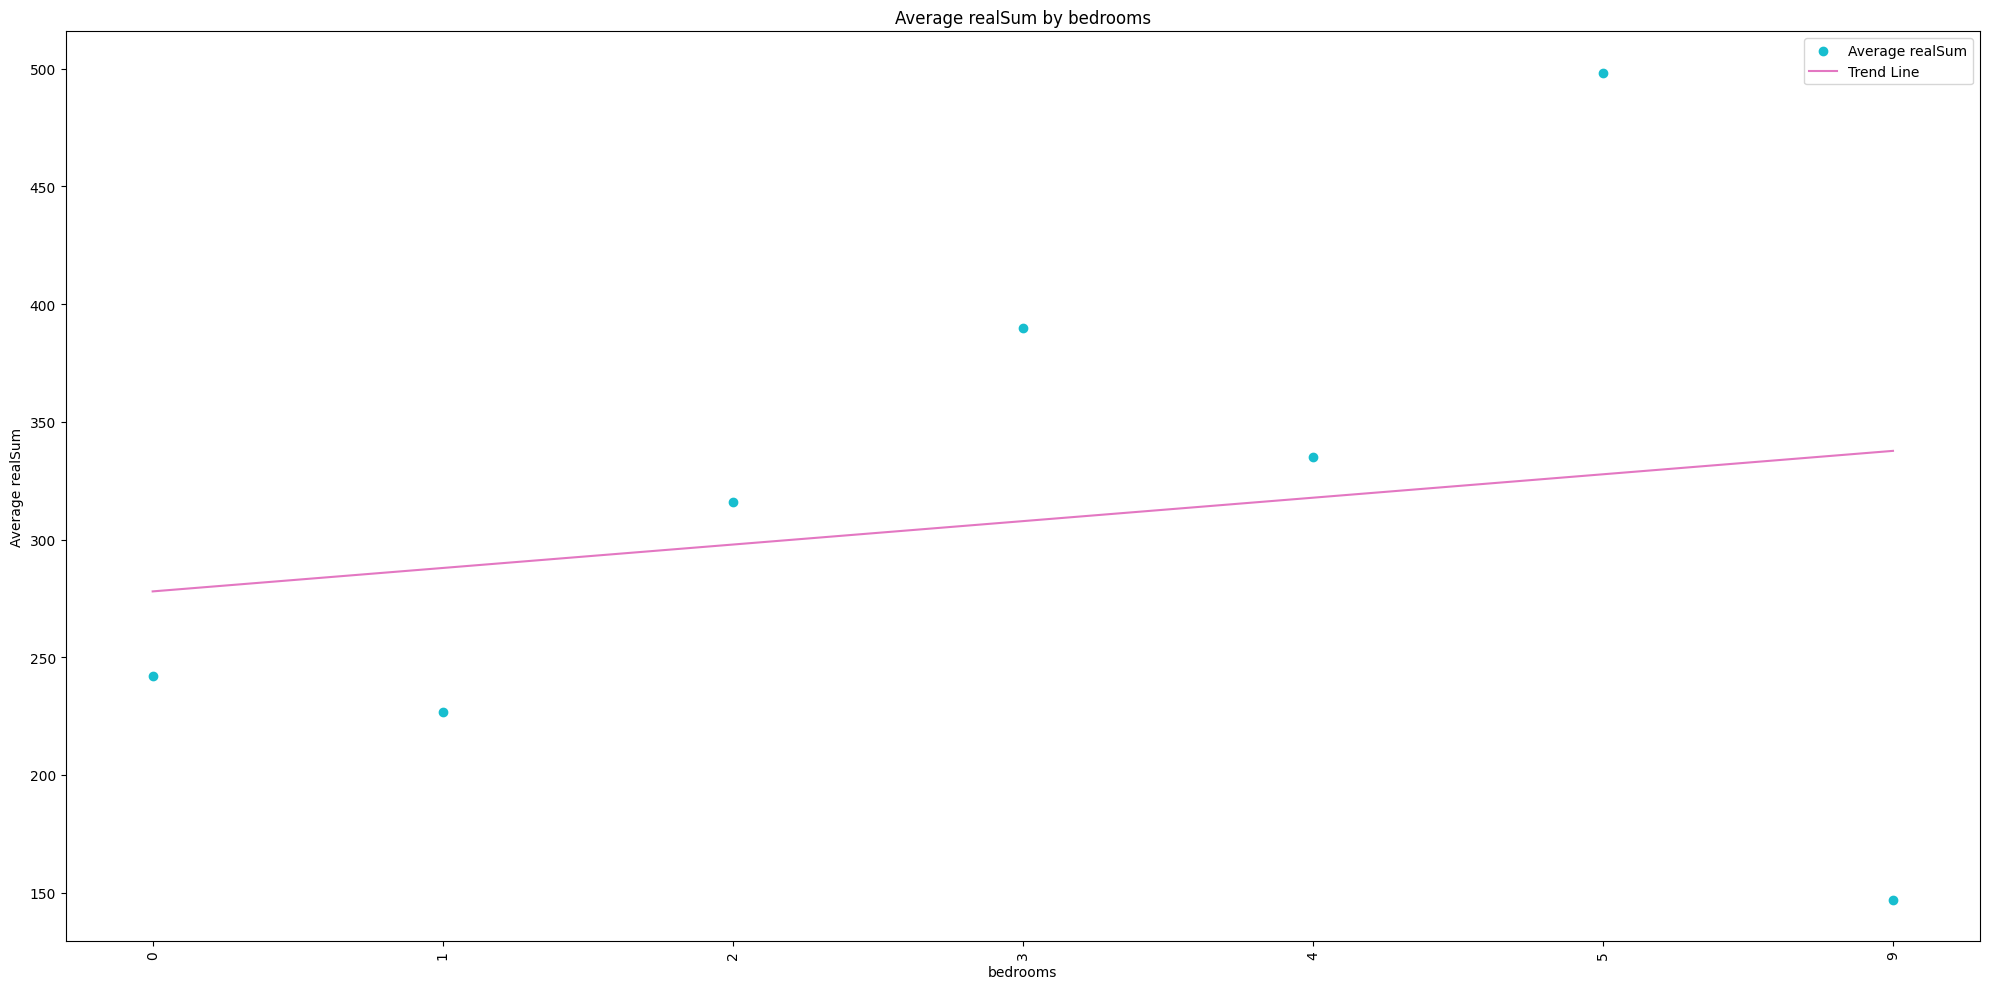

In [244]:
plot_by_average_realSum_scatter_plot('bedrooms', 'Average realSum by bedrooms', 'bedrooms')

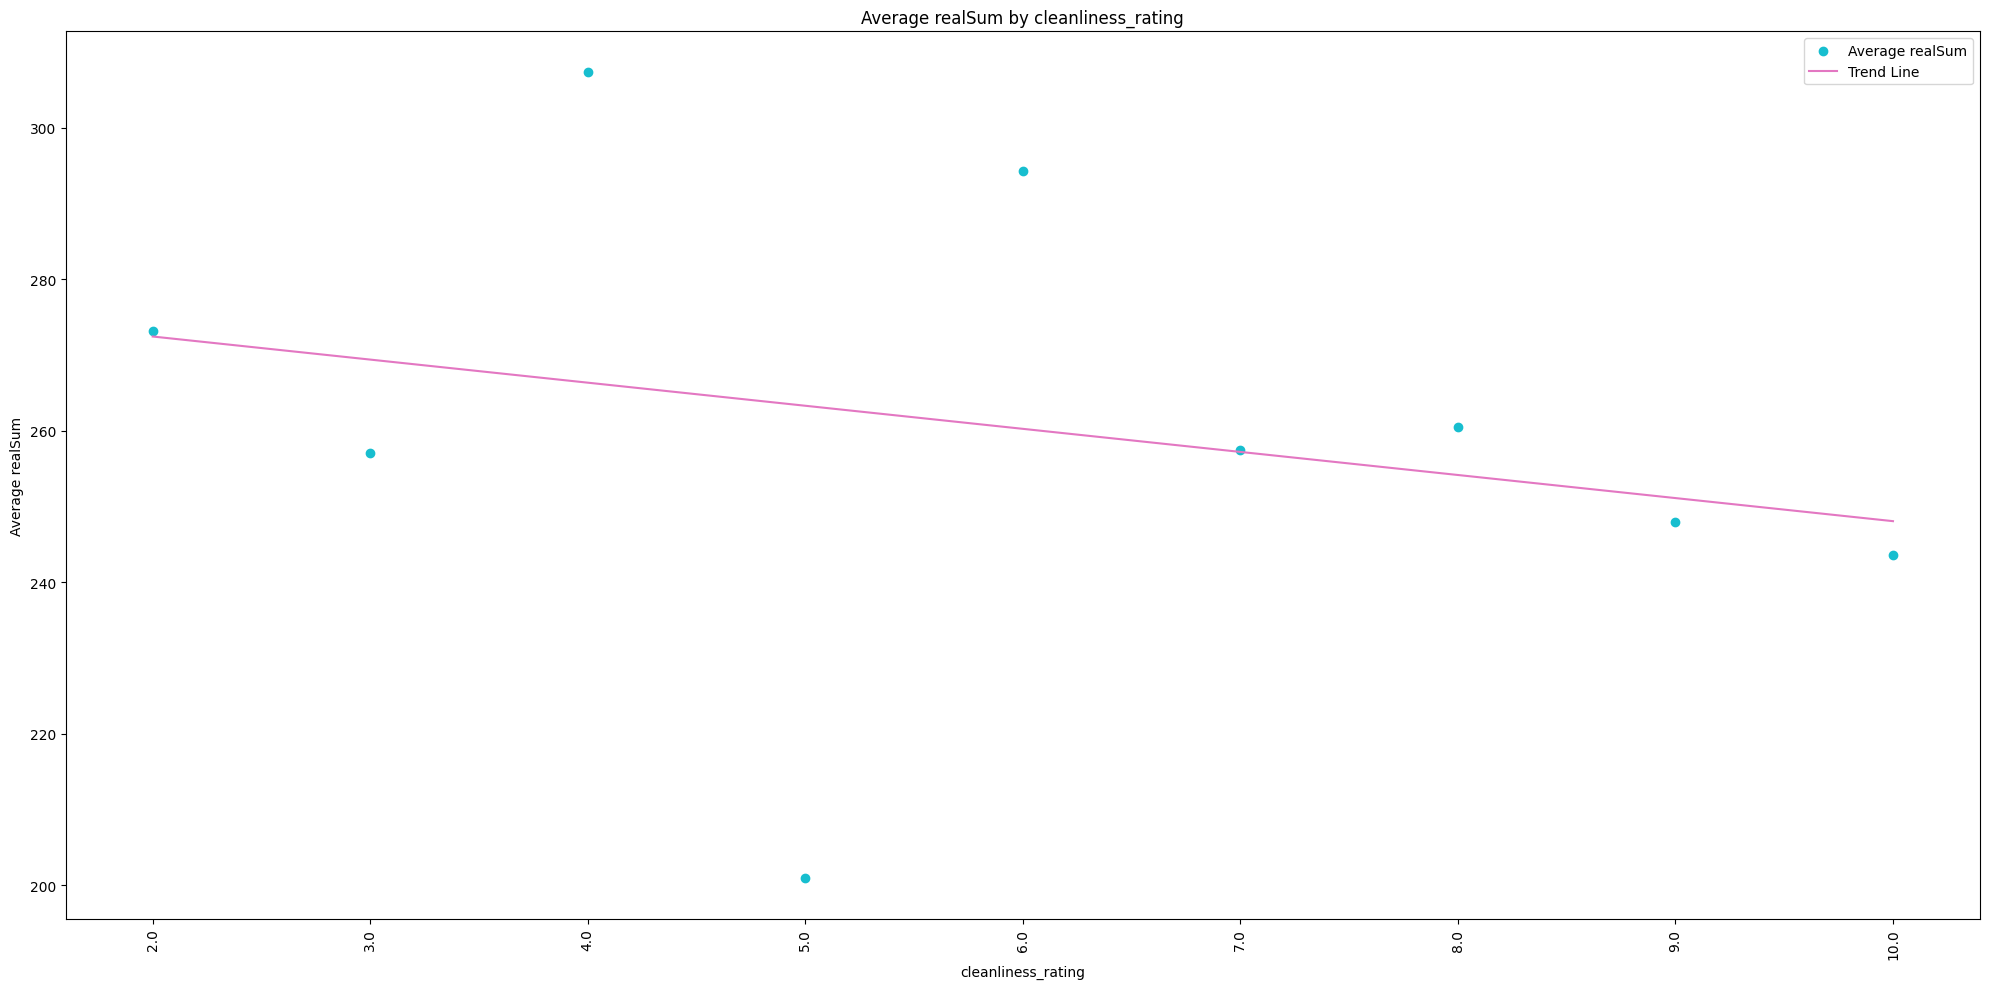

In [245]:
plot_by_average_realSum_scatter_plot('cleanliness_rating', 'Average realSum by cleanliness_rating', 'cleanliness_rating')

In [246]:
all_data = pd.concat([combined_df[independant_variables].reset_index(drop=True),  combined_df[dependent_variables].reset_index(drop=True)], axis=1)
all_data.head()

,person_capacity,guest_satisfaction_overall,bedrooms,dist,metro_dist,host_is_superhost,cleanliness_rating,attr_index,rest_index,city_amsterdam,...,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_original,realSum
0,3.0,100.0,2,2.131420,1.904668,False,8.0,174.788957,225.201662,True,...,False,False,False,False,False,False,True,False,Private room,552.808567
1,2.0,94.0,1,1.881092,0.729747,False,10.0,200.167652,242.765524,True,...,False,False,False,False,False,False,True,False,Private room,215.124317
2,4.0,96.0,2,3.719141,1.196112,False,9.0,106.226456,133.876202,True,...,False,False,False,False,False,True,False,False,Entire home/apt,1001.804420
3,2.0,88.0,1,3.142361,0.924404,False,10.0,206.252862,238.291258,True,...,False,False,False,False,False,False,True,False,Private room,276.521454
4,2.0,96.0,1,1.009922,0.917115,False,10.0,409.858124,555.114276,True,...,False,False,False,False,False,True,False,False,Entire home/apt,909.474375


In [247]:
from scipy.stats import pearsonr

In [248]:
dependent_variable = 'realSum'

In [249]:
print("Pearson Correlation Coefficients:")
print("person_capacity:", pearsonr(all_data['person_capacity'], all_data[dependent_variable]))
print("guest_satisfaction_overall:", pearsonr(all_data['guest_satisfaction_overall'], all_data[dependent_variable]))
print("bedrooms:", pearsonr(all_data['bedrooms'], all_data[dependent_variable]))
print("dist:", pearsonr(all_data['dist'], all_data[dependent_variable]))
print("metro_dist:", pearsonr(all_data['metro_dist'], all_data[dependent_variable]))
print("cleanliness_rating:", pearsonr(all_data['cleanliness_rating'], all_data[dependent_variable]))
print("host_is_superhost:", pearsonr(all_data['host_is_superhost'], all_data[dependent_variable]))
print("attr_index:", pearsonr(all_data['attr_index'], all_data[dependent_variable]))
print("rest_index:", pearsonr(all_data['rest_index'], all_data[dependent_variable]))
print("city_amsterdam:", pearsonr(all_data['city_amsterdam'], all_data[dependent_variable]))
print("city_athens:", pearsonr(all_data['city_athens'], all_data[dependent_variable]))
print("city_barcelona:", pearsonr(all_data['city_barcelona'], all_data[dependent_variable]))
print("city_berlin:", pearsonr(all_data['city_berlin'], all_data[dependent_variable]))
print("city_budapest:", pearsonr(all_data['city_budapest'], all_data[dependent_variable]))
print("city_lisbon:", pearsonr(all_data['city_lisbon'], all_data[dependent_variable]))
print("city_london:", pearsonr(all_data['city_london'], all_data[dependent_variable]))
print("city_paris:", pearsonr(all_data['city_paris'], all_data[dependent_variable]))
print("city_rome:", pearsonr(all_data['city_rome'], all_data[dependent_variable]))
print("city_vienna:", pearsonr(all_data['city_vienna'], all_data[dependent_variable]))
print("room_type_Entire home/apt:", pearsonr(all_data['room_type_Entire home/apt'], all_data[dependent_variable]))
print("room_type_Private room:", pearsonr(all_data['room_type_Private room'], all_data[dependent_variable]))
print("room_type_Shared room:", pearsonr(all_data['room_type_Shared room'], all_data[dependent_variable]))

Pearson Correlation Coefficients:
person_capacity: PearsonRResult(statistic=0.24239917103559394, pvalue=1.3674015988336899e-247)
guest_satisfaction_overall: PearsonRResult(statistic=-0.04719518395493937, pvalue=1.1267213611903508e-10)
bedrooms: PearsonRResult(statistic=0.2166442909163972, pvalue=5.476477115637132e-197)
dist: PearsonRResult(statistic=0.082394456480228, pvalue=1.814143240612387e-29)
metro_dist: PearsonRResult(statistic=-0.022903806961388818, pvalue=0.0017581420884998284)
cleanliness_rating: PearsonRResult(statistic=-0.04345400507966686, pvalue=2.899659883420494e-09)
host_is_superhost: PearsonRResult(statistic=-0.09705595066621792, pvalue=2.7911040001904164e-40)
attr_index: PearsonRResult(statistic=0.21681132117712626, pvalue=2.6945970688587635e-197)
rest_index: PearsonRResult(statistic=0.14178808033131676, pvalue=2.308577461531697e-84)
city_amsterdam: PearsonRResult(statistic=0.3807504102612868, pvalue=0.0)
city_athens: PearsonRResult(statistic=-0.2616074581814407, pvalu

**Pearson Correlation Coefficients:**

1. **Person Capacity**: Moderate positive correlation (0.24, p < 0.001). As person capacity increases, prices tend to increase moderately.

2. **Guest Satisfaction Overall**: Weak negative correlation (-0.05, p < 0.01). Prices slightly decrease with higher satisfaction ratings.

3. **Bedrooms**: Moderate positive correlation (0.22, p < 0.001). More bedrooms correlate with higher prices.

4. **Distance to City Center**: Weak positive correlation (0.08, p < 0.001). There is a slight increase in prices with a greater distance from the city center.

5. **Distance to Metro**: Very weak negative correlation (-0.02, p = 0.002). There is almost no linear relationship between the distance to the metro and prices.

6. **Cleanliness Rating**: Weak negative correlation (-0.04, p < 0.001). There is a slight decrease in prices with higher cleanliness ratings.

7. **Host is Superhost**: Weak negative correlation (-0.10, p < 0.001). Prices are slightly lower for superhosts.

8. **Attraction Index**: Moderate positive correlation (0.22, p < 0.001). A higher attraction index correlates with higher prices.

9. **Restaurant Index**: Weak positive correlation (0.14, p < 0.001). There is a slight increase in prices with a higher restaurant index.

10. **City - Amsterdam**: Strong positive correlation (0.38, p < 0.001). Prices are higher compared to other cities.

11. **City - Athens**: Moderate negative correlation (-0.26, p < 0.001). Prices are lower compared to other cities.

12. **City - Barcelona**: Very weak positive correlation (0.03, p = 0.000). Prices are slightly higher compared to other cities.

13. **City - Berlin**: Weak negative correlation (-0.06, p < 0.001). Prices are slightly lower compared to other cities.

14. **City - Budapest**: Moderate negative correlation (-0.19, p < 0.001). Prices are lower compared to other cities.

15. **City - Lisbon**: Weak negative correlation (-0.06, p < 0.001). Prices are slightly lower compared to other cities.

16. **City - London**: Moderate positive correlation (0.19, p < 0.001). Prices are higher compared to other cities.

17. **City - Paris**: Strong positive correlation (0.29, p < 0.001). Prices are higher compared to other cities.

18. **City - Rome**: Moderate negative correlation (-0.19, p < 0.001). Prices are lower compared to other cities.

19. **City - Vienna**: Weak negative correlation (-0.06, p < 0.001). Prices are slightly lower compared to other cities.

20. **Room Type - Entire home/apt**: Moderate positive correlation (0.24, p < 0.001). Prices are higher for entire homes or apartments.

21. **Room Type - Private room**: Moderate negative correlation (-0.24, p < 0.001). Prices are lower for private rooms.

22. **Room Type - Shared room**: Weak negative correlation (-0.04, p = 0.002). Prices are slightly lower for shared rooms.

In summary, the analysis reveals various correlations between different features and the real sum of prices. Notably, features such as person capacity, attraction index, and the presence of Amsterdam or Paris as cities exhibit stronger correlations, indicating their significant influence on booking sums. Conversely, features like distance to the metro or cleanliness rating show weaker correlations, suggesting a less pronounced impact on prices. Adjustments in marketing or pricing strategies may be considered based on these correlations to optimize booking outcomes.


In [250]:
import statsmodels.api as sm

In [251]:
print(all_data.dtypes)

person_capacity               float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
host_is_superhost                bool
cleanliness_rating            float64
attr_index                    float64
rest_index                    float64
city_amsterdam                   bool
city_athens                      bool
city_barcelona                   bool
city_berlin                      bool
city_budapest                    bool
city_lisbon                      bool
city_london                      bool
city_paris                       bool
city_rome                        bool
city_vienna                      bool
room_type_Entire home/apt        bool
room_type_Private room           bool
room_type_Shared room            bool
room_type_original             object
realSum                       float64
dtype: object


In [252]:
bool_variables = ['city_amsterdam', 'city_athens', 'city_barcelona', 'city_berlin', 
                  'city_budapest', 'city_lisbon', 'city_london', 'city_paris', 
                  'city_rome', 'city_vienna', 'room_type_Entire home/apt', 
                  'room_type_Private room', 'room_type_Shared room', 'host_is_superhost']

for var in bool_variables:
    all_data[var] = all_data[var].astype(int)
    
all_data.drop(columns=['room_type_original'], inplace=True)

independant_variables.remove('room_type_original')

In [253]:
def simple_linear_regression(iv, dv):
    X = sm.add_constant(all_data[iv])
    y = all_data[dv]
    
    model = sm.OLS(y, X).fit()
    
    print(f"Simple Linear Regression Results for {iv} and {dv}:")
    print(model.summary())

In [254]:
simple_linear_regression('person_capacity', dependent_variable)

Simple Linear Regression Results for person_capacity and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1164.
Date:                Sun, 05 May 2024   Prob (F-statistic):          1.37e-247
Time:                        21:55:59   Log-Likelihood:            -1.1885e+05
No. Observations:               18653   AIC:                         2.377e+05
Df Residuals:                   18651   BIC:                         2.377e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [255]:
simple_linear_regression('guest_satisfaction_overall', dependent_variable)

Simple Linear Regression Results for guest_satisfaction_overall and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     41.64
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.13e-10
Time:                        21:55:59   Log-Likelihood:            -1.1939e+05
No. Observations:               18653   AIC:                         2.388e+05
Df Residuals:                   18651   BIC:                         2.388e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [256]:
simple_linear_regression('bedrooms', dependent_variable)

Simple Linear Regression Results for bedrooms and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     918.5
Date:                Sun, 05 May 2024   Prob (F-statistic):          5.48e-197
Time:                        21:55:59   Log-Likelihood:            -1.1897e+05
No. Observations:               18653   AIC:                         2.379e+05
Df Residuals:                   18651   BIC:                         2.379e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [257]:
simple_linear_regression('dist', dependent_variable)

Simple Linear Regression Results for dist and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     127.5
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.81e-29
Time:                        21:55:59   Log-Likelihood:            -1.1935e+05
No. Observations:               18653   AIC:                         2.387e+05
Df Residuals:                   18651   BIC:                         2.387e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [258]:
simple_linear_regression('metro_dist', dependent_variable)

Simple Linear Regression Results for metro_dist and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.789
Date:                Sun, 05 May 2024   Prob (F-statistic):            0.00176
Time:                        21:55:59   Log-Likelihood:            -1.1941e+05
No. Observations:               18653   AIC:                         2.388e+05
Df Residuals:                   18651   BIC:                         2.388e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [259]:
simple_linear_regression('cleanliness_rating', dependent_variable)

Simple Linear Regression Results for cleanliness_rating and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     35.28
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.90e-09
Time:                        21:55:59   Log-Likelihood:            -1.1940e+05
No. Observations:               18653   AIC:                         2.388e+05
Df Residuals:                   18651   BIC:                         2.388e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [260]:
simple_linear_regression('host_is_superhost', dependent_variable)

Simple Linear Regression Results for host_is_superhost and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.79e-40
Time:                        21:55:59   Log-Likelihood:            -1.1933e+05
No. Observations:               18653   AIC:                         2.387e+05
Df Residuals:                   18651   BIC:                         2.387e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [261]:
simple_linear_regression('attr_index', dependent_variable)

Simple Linear Regression Results for attr_index and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     920.0
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.69e-197
Time:                        21:55:59   Log-Likelihood:            -1.1896e+05
No. Observations:               18653   AIC:                         2.379e+05
Df Residuals:                   18651   BIC:                         2.379e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [262]:
simple_linear_regression('rest_index', dependent_variable)

Simple Linear Regression Results for rest_index and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     382.6
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.31e-84
Time:                        21:55:59   Log-Likelihood:            -1.1922e+05
No. Observations:               18653   AIC:                         2.385e+05
Df Residuals:                   18651   BIC:                         2.385e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [263]:
simple_linear_regression('city_amsterdam', dependent_variable)

Simple Linear Regression Results for city_amsterdam and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     3162.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        21:55:59   Log-Likelihood:            -1.1795e+05
No. Observations:               18653   AIC:                         2.359e+05
Df Residuals:                   18651   BIC:                         2.359e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [264]:
simple_linear_regression('city_athens', dependent_variable)

Simple Linear Regression Results for city_athens and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1370.
Date:                Sun, 05 May 2024   Prob (F-statistic):          1.70e-289
Time:                        21:55:59   Log-Likelihood:            -1.1875e+05
No. Observations:               18653   AIC:                         2.375e+05
Df Residuals:                   18651   BIC:                         2.375e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [265]:
simple_linear_regression('city_barcelona', dependent_variable)

Simple Linear Regression Results for city_barcelona and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.61
Date:                Sun, 05 May 2024   Prob (F-statistic):           0.000225
Time:                        21:55:59   Log-Likelihood:            -1.1941e+05
No. Observations:               18653   AIC:                         2.388e+05
Df Residuals:                   18651   BIC:                         2.388e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [266]:
simple_linear_regression('city_berlin', dependent_variable)

Simple Linear Regression Results for city_berlin and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     58.38
Date:                Sun, 05 May 2024   Prob (F-statistic):           2.26e-14
Time:                        21:55:59   Log-Likelihood:            -1.1938e+05
No. Observations:               18653   AIC:                         2.388e+05
Df Residuals:                   18651   BIC:                         2.388e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [267]:
simple_linear_regression('city_budapest', dependent_variable)

Simple Linear Regression Results for city_budapest and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     664.7
Date:                Sun, 05 May 2024   Prob (F-statistic):          4.68e-144
Time:                        21:55:59   Log-Likelihood:            -1.1909e+05
No. Observations:               18653   AIC:                         2.382e+05
Df Residuals:                   18651   BIC:                         2.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [268]:
simple_linear_regression('city_lisbon', dependent_variable)

Simple Linear Regression Results for city_lisbon and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.91
Date:                Sun, 05 May 2024   Prob (F-statistic):           3.80e-15
Time:                        21:55:59   Log-Likelihood:            -1.1938e+05
No. Observations:               18653   AIC:                         2.388e+05
Df Residuals:                   18651   BIC:                         2.388e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [269]:
simple_linear_regression('city_london', dependent_variable)

Simple Linear Regression Results for city_london and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     680.7
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.04e-147
Time:                        21:56:00   Log-Likelihood:            -1.1908e+05
No. Observations:               18653   AIC:                         2.382e+05
Df Residuals:                   18651   BIC:                         2.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [270]:
simple_linear_regression('city_paris', dependent_variable)

Simple Linear Regression Results for city_paris and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1701.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        21:56:00   Log-Likelihood:            -1.1860e+05
No. Observations:               18653   AIC:                         2.372e+05
Df Residuals:                   18651   BIC:                         2.372e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [271]:
simple_linear_regression('city_rome', dependent_variable)

Simple Linear Regression Results for city_rome and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     723.5
Date:                Sun, 05 May 2024   Prob (F-statistic):          2.25e-156
Time:                        21:56:00   Log-Likelihood:            -1.1906e+05
No. Observations:               18653   AIC:                         2.381e+05
Df Residuals:                   18651   BIC:                         2.381e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [272]:
simple_linear_regression('city_vienna', dependent_variable)

Simple Linear Regression Results for city_vienna and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     73.43
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.12e-17
Time:                        21:56:00   Log-Likelihood:            -1.1938e+05
No. Observations:               18653   AIC:                         2.388e+05
Df Residuals:                   18651   BIC:                         2.388e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [273]:
simple_linear_regression('room_type_Entire home/apt', dependent_variable)

Simple Linear Regression Results for room_type_Entire home/apt and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1151.
Date:                Sun, 05 May 2024   Prob (F-statistic):          7.64e-245
Time:                        21:56:00   Log-Likelihood:            -1.1886e+05
No. Observations:               18653   AIC:                         2.377e+05
Df Residuals:                   18651   BIC:                         2.377e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [274]:
simple_linear_regression('room_type_Private room', dependent_variable)

Simple Linear Regression Results for room_type_Private room and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1110.
Date:                Sun, 05 May 2024   Prob (F-statistic):          1.73e-236
Time:                        21:56:00   Log-Likelihood:            -1.1887e+05
No. Observations:               18653   AIC:                         2.378e+05
Df Residuals:                   18651   BIC:                         2.378e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [275]:
simple_linear_regression('room_type_Shared room', dependent_variable)

Simple Linear Regression Results for room_type_Shared room and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.98
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.65e-06
Time:                        21:56:00   Log-Likelihood:            -1.1940e+05
No. Observations:               18653   AIC:                         2.388e+05
Df Residuals:                   18651   BIC:                         2.388e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [276]:
simple_linear_regression(independant_variables, dependent_variable)

Simple Linear Regression Results for ['person_capacity', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'host_is_superhost', 'cleanliness_rating', 'attr_index', 'rest_index', 'city_amsterdam', 'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room'] and realSum:
                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     1508.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        21:56:00   Log-Likelihood:            -1.1044e+05
No. Observations:               18653   AIC:                         2.209e+05
Df Resi

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
X_train, X_test, y_train, y_test = train_test_split(all_data.drop(columns=['realSum']), all_data['realSum'], test_size=0.3, random_state=42)

In [279]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13057, 22)
(13057,)
(5596, 22)
(5596,)


In [280]:
from sklearn.linear_model import LinearRegression

In [281]:
model = LinearRegression()

In [282]:
model.fit(X_train,y_train)

LinearRegression()

In [283]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

In [284]:
print(f'Number of features used in the model is {len(model.coef_)}')
print(f'R-squared value of the model on the test set is {r2}')
print(f'MSE of the model on the test set is {mse}')
print(f'RMSE of the model on the test set is {rmse}')

Number of features used in the model is 22
R-squared value of the model on the test set is 0.621276081305991
MSE of the model on the test set is 8259.225557287195
RMSE of the model on the test set is 90.88028145470939


## PCA

In [285]:
from sklearn.discriminant_analysis import StandardScaler

In [286]:
Standard_Scaler = StandardScaler()

In [287]:
scaled_features = pd.DataFrame(Standard_Scaler.fit_transform(all_data[independant_variables]), columns=independant_variables)
scaled_features.head()

,person_capacity,guest_satisfaction_overall,bedrooms,dist,metro_dist,host_is_superhost,cleanliness_rating,attr_index,rest_index,city_amsterdam,...,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.104314,0.834657,1.425831,-0.416948,2.466372,-0.599128,-1.468868,-0.603248,-0.914391,4.720926,...,-0.22959,-0.297001,-0.356373,-0.469411,-0.373353,-0.463959,-0.270067,-1.325471,1.337233,-0.063962
1,-0.895599,0.157912,-0.217827,-0.556400,0.272164,-0.599128,0.638570,-0.449560,-0.870883,4.720926,...,-0.22959,-0.297001,-0.356373,-0.469411,-0.373353,-0.463959,-0.270067,-1.325471,1.337233,-0.063962
2,0.686971,0.383494,1.425831,0.467534,1.143118,-0.599128,-0.415149,-1.018447,-1.140612,4.720926,...,-0.22959,-0.297001,-0.356373,-0.469411,-0.373353,-0.463959,-0.270067,0.754449,-0.747813,-0.063962
3,-0.895599,-0.518833,-0.217827,0.146223,0.635694,-0.599128,0.638570,-0.412709,-0.881967,4.720926,...,-0.22959,-0.297001,-0.356373,-0.469411,-0.373353,-0.463959,-0.270067,-1.325471,1.337233,-0.063962
4,-0.895599,0.383494,-0.217827,-1.041707,0.622081,-0.599128,0.638570,0.820278,-0.097167,4.720926,...,-0.22959,-0.297001,-0.356373,-0.469411,-0.373353,-0.463959,-0.270067,0.754449,-0.747813,-0.063962


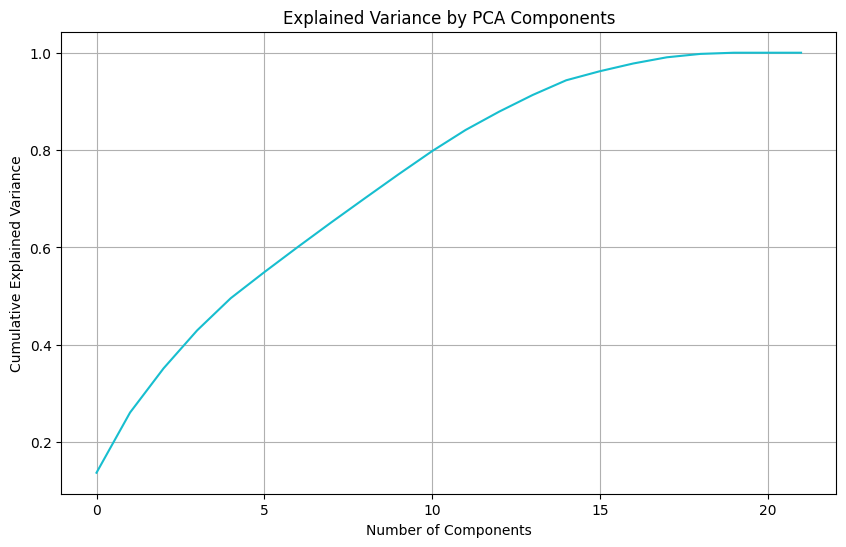

In [288]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
principal_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='#17becf')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


##### Observations on PCA Explained Variance

- **Rapid Growth in Early Components:**
  - The curve shows a steep increase at the beginning, indicating that the first few components capture a substantial amount of the total variance in the data. This suggests that these components are crucial for understanding the underlying patterns in the dataset.

- **Plateau Towards Higher Components:**
  - As more components are added, the increase in explained variance becomes less steep, and it starts to plateau. This indicates that each additional component contributes less to explaining the variability in the data compared to the initial components.

- **Point of Diminishing Returns:**
  - The graph suggests a point of diminishing returns around 10-15 components where the cumulative explained variance grows very slowly with the addition of more components. This could be a practical point to consider stopping the addition of more components in an analysis to avoid overcomplicating the model with minimal gain in explained variance.

- **Approximately 95% Variance Explained:**
  - By around 15 components, the graph shows that about 95% of the total variance has been explained. This level of cumulative variance suggests that the PCA has effectively reduced the dimensionality of the data while retaining most of the information.

- **Practical Application:**
  - Depending on the specific needs of further analysis or the algorithms to be used downstream, one could opt to use around 15 components for a good balance between information retention and model simplicity.

These observations help in determining the number of principal components to use by showing how much each component contributes to understanding the data's overall variance. This aids in making informed decisions on the complexity of the data reduction techniques to apply in subsequent analyses.

In [289]:
pca = PCA()
reduced_data = pca.fit_transform(scaled_features)

In [290]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]

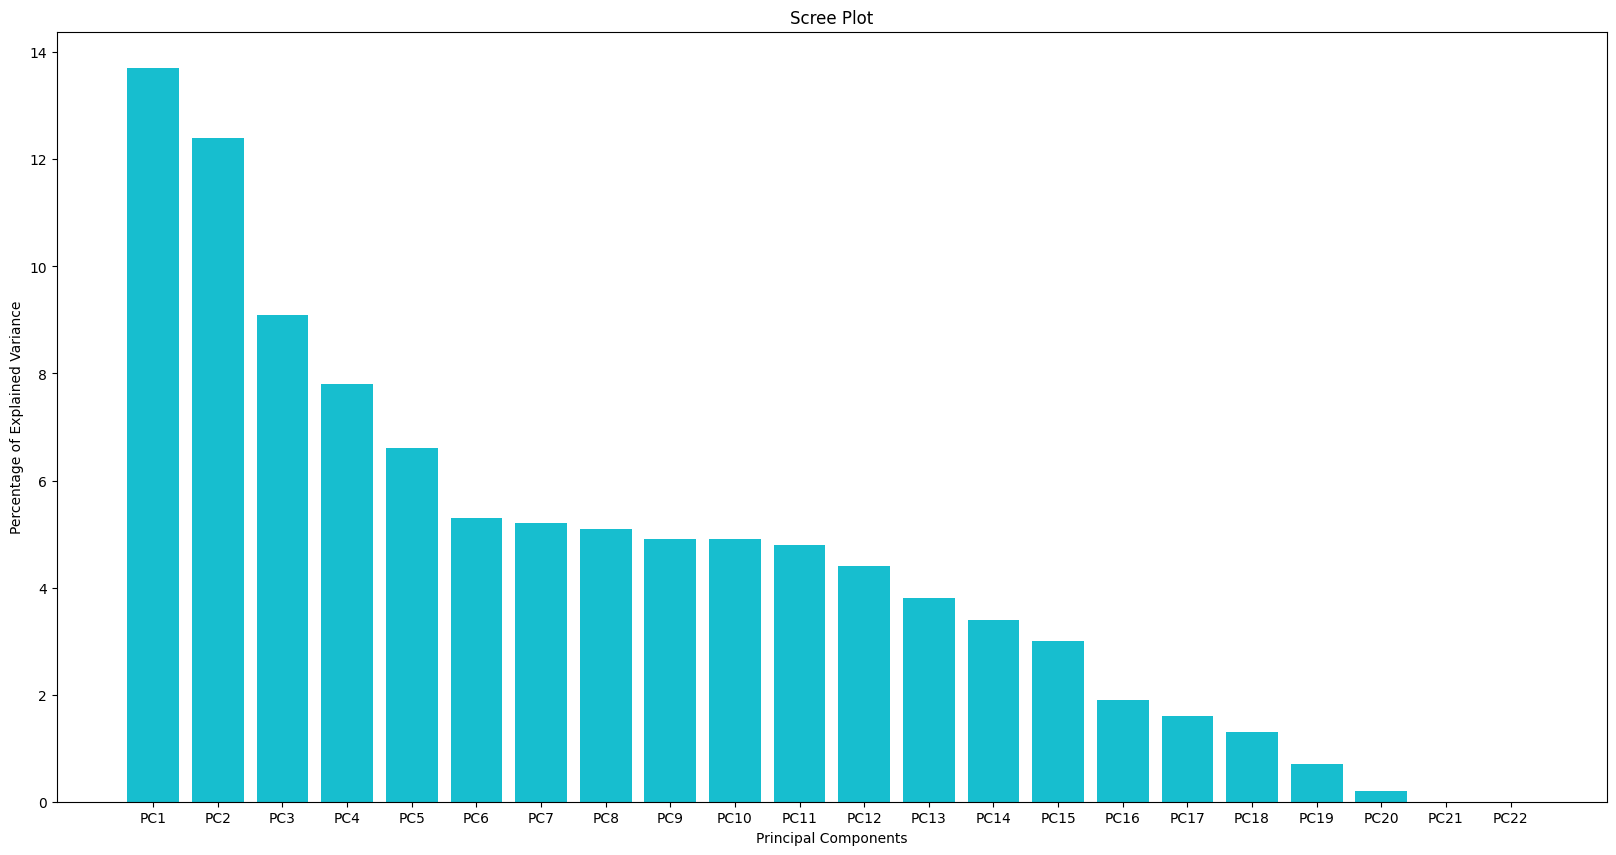

In [291]:
plt.figure(figsize=(20, 10))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color='#17becf')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

##### Observations on Scree Plot

- **Declining Variance Explained by Each Component:**
  - The plot shows a typical scree plot behavior where the percentage of explained variance by each principal component decreases as the component number increases. The first few components explain a significantly higher percentage of the variance compared to subsequent components.

- **Sharp Drop After Initial Components:**
  - There is a noticeable sharp drop in the explained variance after the first few components. This suggests that these initial components capture the most critical features of the data.

- **Elbow Point:**
  - The plot exhibits a potential "elbow" point around the fifth or sixth component, where the rate of decline in variance explained slows down significantly. This elbow point is often considered when deciding how many components to retain for further analysis. It indicates a diminishing return on the value of adding more components.

- **Long Tail of Components:**
  - After the elbow point, the plot flattens out but continues to slope downwards, indicating that each subsequent component still adds a small amount of new information. This tail suggests that while these components are less informative, they still contribute to capturing the complete picture of the data.

- **Decision Making for Dimension Reduction:**
  - Based on this scree plot, a decision might be made to cut off the number of components at the elbow point to reduce dimensionality while still capturing most of the variation in the data. Retaining components beyond this point might not be as beneficial, depending on the specific requirements of further analysis or the trade-offs between complexity and explanation power.

These insights from the scree plot are critical in PCA analysis as they visually aid in determining the optimal number of principal components to use by highlighting how much new information each component contributes to understanding the data.


In [292]:
loading_scores = pd.Series(pca.components_[0], index=independant_variables)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

room_type_Private room        0.450781
room_type_Entire home/apt     0.449728
person_capacity               0.337259
attr_index                    0.277513
rest_index                    0.276532
city_athens                   0.274682
city_london                   0.209142
dist                          0.179302
city_budapest                 0.175250
bedrooms                      0.174877
city_barcelona                0.162449
city_rome                     0.143067
city_vienna                   0.137757
guest_satisfaction_overall    0.114280
host_is_superhost             0.113837
cleanliness_rating            0.102106
city_lisbon                   0.077777
metro_dist                    0.066534
city_paris                    0.037400
city_berlin                   0.022915
room_type_Shared room         0.000419
city_amsterdam                0.000173
dtype: float64

In [293]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

## Clustering

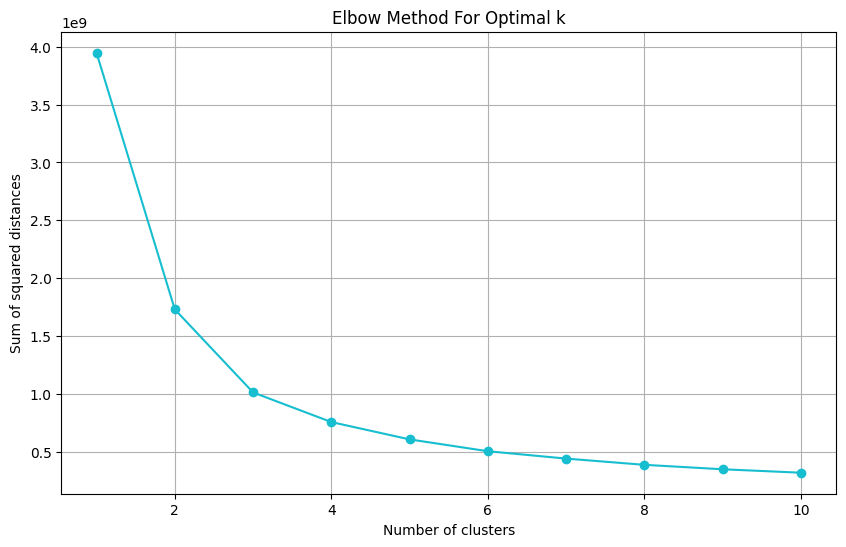

In [294]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(all_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', color='#17becf')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

##### Observations on Elbow Method for Optimal k

- **Steep Decline in Initial Clusters:**
  - The Sum of Squared Distances (SSD) decreases sharply as the number of clusters increases from 1 to 3. This indicates a significant gain in terms of reducing the within-cluster variance as more clusters are added initially.

- **Elbow Point:**
  - The graph shows a clear "elbow" around the k=3 mark. This is where the rate of decrease in SSD becomes markedly flatter, suggesting diminishing returns on the variance explained by adding additional clusters beyond this point.

- **Stabilization Beyond the Elbow:**
  - Beyond three clusters, the decrease in SSD slows down significantly, and the curve starts to flatten. This stabilization suggests that adding more clusters beyond this point might not provide substantial improvements in clustering the dataset.

- **Decision for Clustering:**
  - Based on the elbow point, it might be most efficient to select three clusters for this specific analysis. This would balance the complexity of the model (in terms of the number of clusters) and the effectiveness in grouping the data.

- **Practical Implications:**
  - Choosing three clusters could lead to a more interpretable and meaningful segmentation of the data, as each cluster can be analyzed to identify unique characteristics, patterns, or groups within the dataset.

These insights from the Elbow Method plot are critical in determining the appropriate number of clusters to use in k-means clustering, helping to ensure that the model is neither too simple (underfitting) nor too complex (overfitting).


In [295]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

features = ['room_type_Private room', 'room_type_Entire home/apt', 'person_capacity', 'attr_index', 'rest_index']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(all_data[features])

kmeans = KMeans(n_clusters=3, random_state=42)
all_data['Cluster'] = kmeans.fit_predict(scaled_features)

cluster_means = all_data.groupby('Cluster')[features + ['realSum']].mean()
print(cluster_means)


/home/ndavido/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         room_type_Private room  room_type_Entire home/apt  person_capacity  \
Cluster                                                                       
0                      0.099309                   0.898389         3.487011   
1                      0.000000                   0.995001         3.598305   
2                      0.996412                   0.000000         2.293870   

         attr_index   rest_index     realSum  
Cluster                                       
0        525.843542  1196.481970  317.225722  
1        194.028374   403.969722  256.461482  
2        270.490796   581.937919  200.780338  


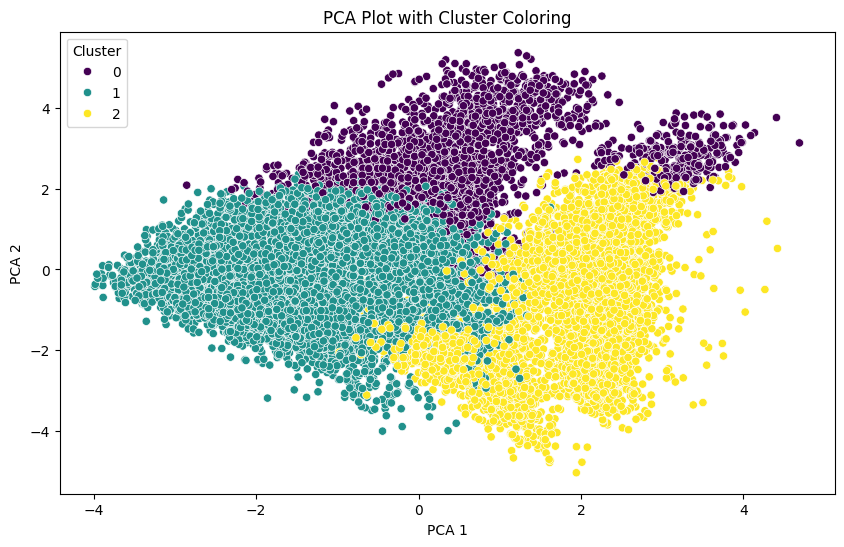

In [296]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=all_data['Cluster'], palette='viridis')
plt.title('PCA Plot with Cluster Coloring')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

##### Cluster Distribution and Characteristics
- **Cluster 0 (Purple)**
    - Positioned mostly to the left and slightly upwards, suggesting that the features reduced into PCA 1 are more negative, while PCA 2 is slightly positive. 
    - This cluster might represent data points that have lower values of some key features that strongly negatively load on PCA 1. 
    - The positive slight on PCA 2 could indicate moderate values of features that have positive loading on this component. 
    - This cluster could be characterized by specific traits or conditions that are distinct within the dataset.
- **Cluster 1 (Teal)**
    - This cluster is centered around the middle of PCA 1 and spreads across lower values on PCA 2. 
    - Cluster 1 is likely to represent a more 'average' or central grouping of data points, with average values of the features that influence both principal components. 
    - The spread along PCA 2 might indicate variability in some characteristics that are not captured by PCA 1.
- **Cluster 2 (Yellow)**
    - Positioned towards the right, indicating higher values on PCA 1, and covers a broad range of PCA 2. 
    - This cluster represents data points with high values of features that positively load on PCA 1. 
    - The wide range on PCA 2 suggests that this cluster might include a variety of behaviors or characteristics despite sharing high values of PCA 1 loading features.

In [297]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, all_data['Cluster'])
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.461


**Silhouette Score of 0.461:** 
- This score indicates moderate separation between clusters.

1. **Cluster Cohesion:** 
    - The clusters formed are reasonably coherent, meaning that within each cluster, data points are relatively similar to each other.
2. **Cluster Separation:** 
    - There is a decent level of separation from other clusters, though there could still be some overlap or the distance between different clusters might not be very large.

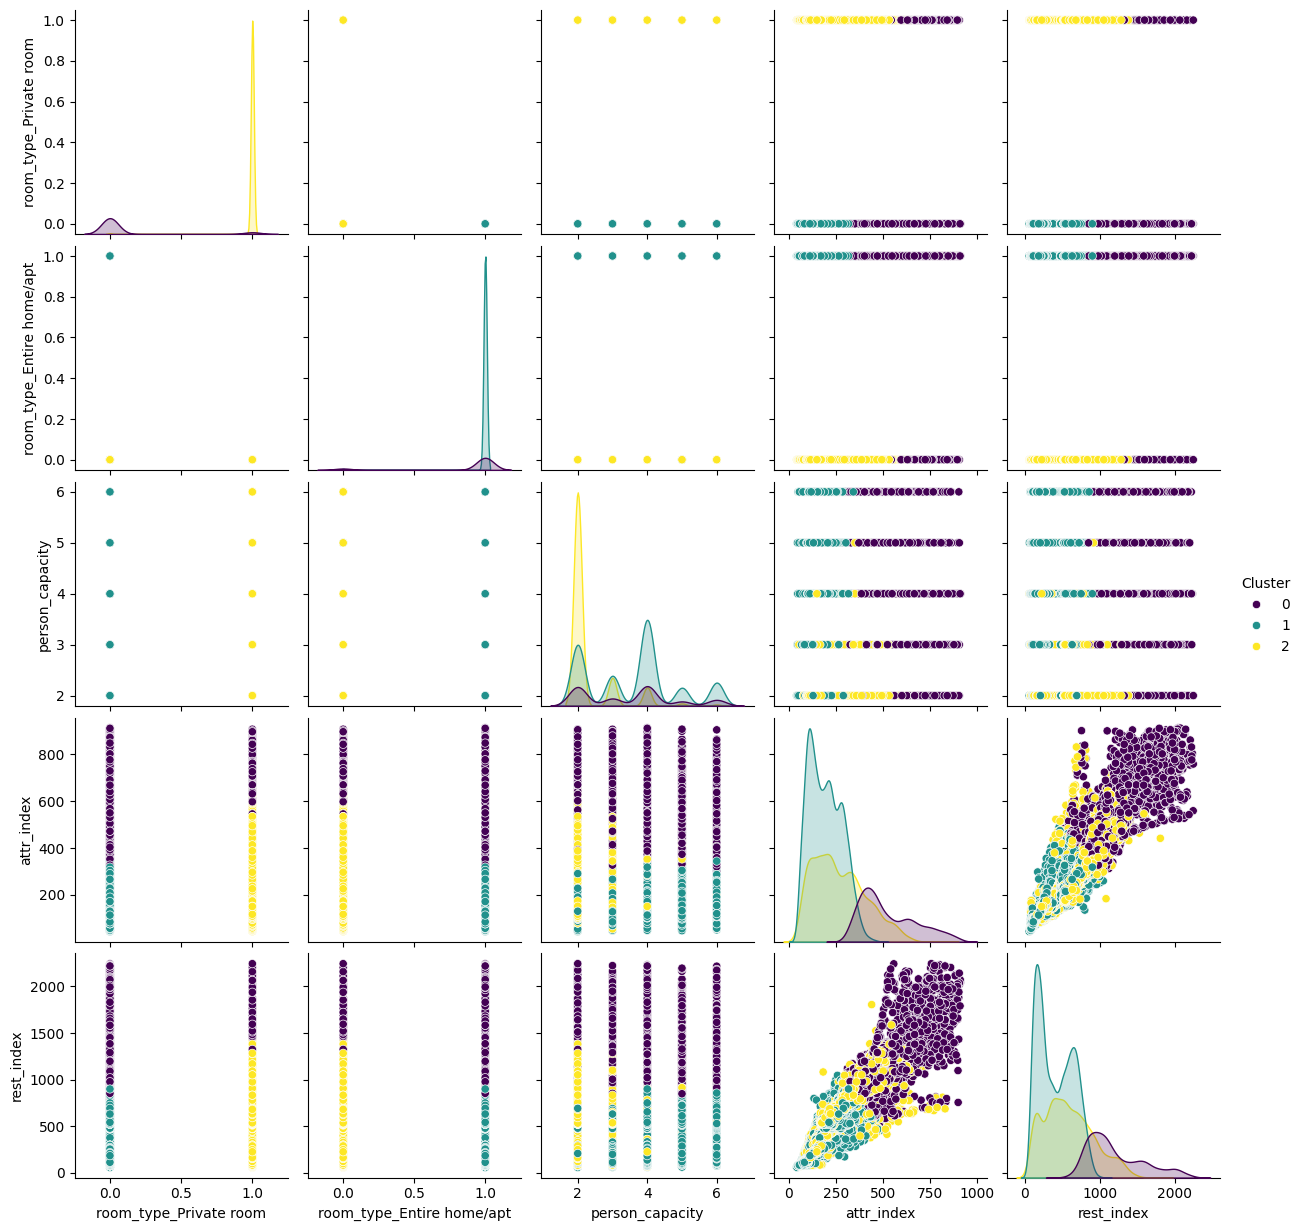

In [298]:
sns.pairplot(all_data[features + ['Cluster']], hue='Cluster', palette='viridis')
plt.show()

##### Detailed Cluster Analysis

1. Room Type Distribution
    - **Cluster 0**:
      - Predominantly consists of "Entire home/apt," suggesting a preference for privacy or accommodations for larger groups.
    - **Cluster 1**:
      - Mainly consists of "Private room," indicating a possible preference for solo travelers or budget-conscious customers.
    - **Cluster 2**:
      - Almost exclusively prefers "Entire home/apt." This is similar to Cluster 0 but with an even stronger focus on this type of accommodation.

2. Person Capacity
    - Cluster 2 displays the highest person capacity, aligning with its preference for entire homes or apartments, suitable for larger groups or families.
    - Clusters 0 and 1 show lower capacities on average:
      - Cluster 0: Moderate person capacity.
      - Cluster 1: The lowest person capacity, correlating with its preference for "Private room."

3. Attraction and Restaurant Indexes
    - **Cluster 2**:
      - Features substantially higher `attr_index` and `rest_index`, indicating locations in or near areas with numerous attractions and dining options, likely reflecting premium property locations.
    - **Clusters 0 and 1**:
      - Exhibit lower scores on both indices, with Cluster 1 scoring the lowest, suggesting locations that are possibly less central or not primarily tourist-focused.

4. Density and Distribution
    - The diagonal density plots reveal:
      - **Clusters 0 and 1** have more compact distributions of features like `person_capacity`, suggesting uniformity in the type of accommodations offered.
      - **Cluster 2** shows a broader spread in features like `attr_index` and `rest_index`, indicating a diversity in property types and perhaps a range of different customer preferences or property valuations.


##### Analysis of `realSum` Based on Cluster Characteristics

1. Impact of Room Type on `realSum`
    - **Clusters 0 and 2**: Predominantly feature "Entire home/apt" listings, which typically command higher prices due to factors like greater space and privacy. These listings are ideal for groups seeking comfort or extended stays, justifying higher pricing.
    - **Cluster 1**: Composed mainly of "Private room" listings, which are generally less expensive, catering to budget travelers or individuals.

2. Person Capacity
    - **Higher Capacities in Cluster 2**: This cluster's listings, which have a higher capacity, are capable of hosting more guests, leading to a direct increase in `realSum`. Larger groups or families often prefer these listings, which boosts the price point significantly compared to smaller accommodations.

3. Attraction and Restaurant Proximity (`attr_index` and `rest_index`)
    - **Cluster 2's Higher Index Values**: Indicate locations near key attractions and quality dining options. Such premium locations naturally attract higher pricing due to the convenience and desirability they offer tourists and visitors.

4. Geographical Factors
    - **Tourist-heavy Cities**: Listings in cities like those most common in Cluster 0 (e.g., major metropolitan or tourist centers) inherently demand higher prices. Economic factors, demand levels, and the general cost of living in these areas contribute to elevated `realSum`.


## Normalisation

In [299]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

all_data_normalized = all_data.copy()
all_data_normalized[independant_variables] = scaler.fit_transform(all_data[independant_variables])

all_data_normalized.head()

,person_capacity,guest_satisfaction_overall,bedrooms,dist,metro_dist,host_is_superhost,cleanliness_rating,attr_index,rest_index,city_amsterdam,...,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,realSum,Cluster
0,0.25,1.000,0.222222,0.182966,0.333857,0.0,0.750,0.150901,0.076653,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,552.808567,2
1,0.00,0.925,0.111111,0.161122,0.127218,0.0,1.000,0.180089,0.084683,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,215.124317,2
2,0.50,0.950,0.222222,0.321513,0.209240,0.0,0.875,0.072048,0.034899,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1001.804420,1
3,0.00,0.850,0.111111,0.271182,0.161453,0.0,1.000,0.187087,0.082637,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,276.521454,2
4,0.00,0.950,0.111111,0.085103,0.160171,0.0,1.000,0.421250,0.227487,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,909.474375,1


In [300]:
from sklearn.model_selection import train_test_split

X = all_data_normalized[independant_variables]
y = all_data['realSum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [301]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [302]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Number of features used in the model is {len(model.coef_)}')
print(f'R-squared value of the model on the test set is {r2}')
print(f'MSE of the model on the test set is {mse}')
print(f'RMSE of the model on the test set is {rmse}')

Number of features used in the model is 22
R-squared value of the model on the test set is 0.6211783953265746
MSE of the model on the test set is 8261.35589682468
RMSE of the model on the test set is 90.88028145470939


The results indicating that the model performance has not changed significantly post-normalization is an interesting observation. It suggests that the scale of the features might not have been a limiting factor in your model’s performance. 

## Creating Index

In [303]:
combined_df['adjusted_realSum'] = 1 / combined_df['realSum']

In [304]:
scaler = MinMaxScaler()
combined_df['adjusted_realSum'] = scaler.fit_transform(combined_df[['adjusted_realSum']])

In [305]:
weights = {
    'person_capacity': 0.1,
    'guest_satisfaction_overall': 0.2,
    'cleanliness_rating': 0.2,
    'attr_index': 0.15,
    'rest_index': 0.15,
    'adjusted_realSum': 0.2
}

In [306]:
combined_df['value_index'] = (combined_df['person_capacity'] * weights['person_capacity'] +
                              combined_df['guest_satisfaction_overall'] * weights['guest_satisfaction_overall'] +
                              combined_df['cleanliness_rating'] * weights['cleanliness_rating'] +
                              combined_df['attr_index'] * weights['attr_index'] +
                              combined_df['rest_index'] * weights['rest_index'] +
                              combined_df['adjusted_realSum'] * weights['adjusted_realSum'])


In [307]:
city_value_rankings = combined_df.groupby('city_original')['value_index'].mean().sort_values(ascending=False)
print(city_value_rankings)

city_original
rome         247.755547
barcelona    218.864261
paris        195.082459
london       147.685260
lisbon       132.262222
budapest     117.268126
amsterdam    107.112023
athens        70.273450
vienna        61.021223
berlin        57.275882
Name: value_index, dtype: float64


/tmp/ipykernel_1238/628512184.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_value_rankings.index, y=city_value_rankings.values, palette="viridis")


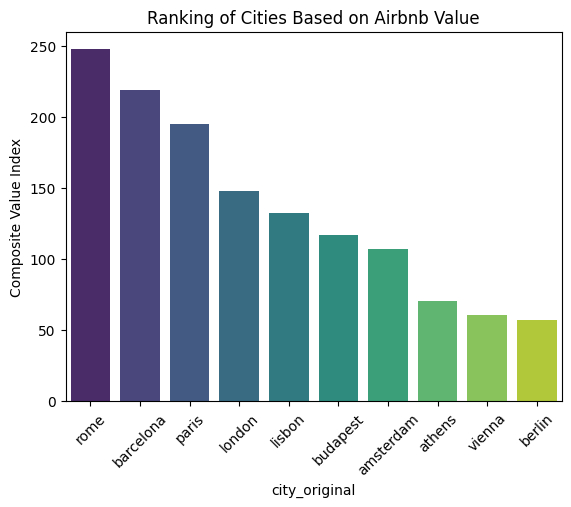

In [311]:
sns.barplot(x=city_value_rankings.index, y=city_value_rankings.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel('Composite Value Index')
plt.title('Ranking of Cities Based on Airbnb Value')
plt.show()

##### Detailed Observations from the Bar Chart

1. Top Ranked Cities:
    - **Rome** leads the chart with the highest composite value index, suggesting that it offers the best value in terms of the factors considered. This could be due to a combination of reasonable pricing, good guest satisfaction, or excellent amenities and location.
    - **Barcelona and Paris** follow closely, indicating they are also strong contenders in terms of value offered to Airbnb guests. These cities are known for their tourist attractions, which might enhance their location and amenities scores.

2. Middle Tier:
    - **London, Lisbon, and Budapest** form the middle tier. Although they score lower than the top tier cities, they still offer substantial value. London's lower score relative to cities like Rome and Barcelona could be influenced by higher average pricing, which may weigh down its value index despite high scores in other components like satisfaction and amenities.

3. Lower Tier:
    - **Amsterdam, Athens, Vienna, and Berlin** appear in the lower tier. Despite being popular tourist destinations, these cities might have lower rankings due to various factors like higher pricing or lower guest satisfaction rates in comparison to the other cities listed.
